Set Up the Environment

We configure our workspace with the essential libraries needed for:

    Data manipulation (numpy, pandas)
    
    Data visualization (matplotlib, seaborn)
    
    Statistical analysis (scipy.stats)
    
    Machine learning workflows, including:
    
    Preprocessing (StandardScaler, PCA, SelectFromModel)
    
    Model development (Logistic Regression, Random Forest, Decision Tree)
    
    Model selection and evaluation (train_test_split, cross_val_score, GridSearchCV, classification_report, roc_curve, auc)
    
    Model explainability (SHAP) to interpret machine learning predictions

In [3]:
# Core Python Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Statistical Functions
from scipy import stats

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Model Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

# Model Explainability
import shap

Load the data set and use mapping of response labels

    Source of data set: https://www.cdc.gov/brfss/annual_data/annual_2023.html

In [5]:
# Load BRFSS data
df_survey = pd.read_csv(r"C:\Users\joyce\usable_ai\project\data\BRFSS2023.csv")

# Preview
df_survey.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,1.0,1.0,3012023,3,1,2023,1100.0,2023000001,2.023000e+09,1.0,...,0.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,9.0
1,1.0,1.0,1062023,1,6,2023,1100.0,2023000002,2.023000e+09,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,9.0
2,1.0,1.0,3082023,3,8,2023,1100.0,2023000003,2.023000e+09,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,9.0
3,1.0,1.0,3062023,3,6,2023,1100.0,2023000004,2.023000e+09,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0
4,1.0,1.0,1062023,1,6,2023,1100.0,2023000005,2.023000e+09,1.0,...,7.0,1.0,47.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0


Data Familiarization

We review the dataset to prepare for analysis by:

    Inspecting the structure, data types, and missing values.
    
    Mapping coded survey responses to readable labels.
    
    Filtering to completed interviews only.
    
    Displaying sample entries for a quick visual check.

In [7]:
# See info
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Columns: 350 entries, _STATE to _DRNKDRV
dtypes: float64(345), int64(5)
memory usage: 1.1 GB


In [9]:
# 433,323  records | 350 columns

# See info as a data frame
df_info = pd.DataFrame({
    'Column': df_survey.columns,
    'Null Count': df_survey.isnull().sum().values,
    'Dtype': df_survey.dtypes.values
})

# Print all
with pd.option_context('display.max_rows', None):
    print(df_info)

       Column  Null Count    Dtype
0      _STATE           0  float64
1      FMONTH           0  float64
2       IDATE           0    int64
3      IMONTH           0    int64
4        IDAY           0    int64
5       IYEAR           0    int64
6    DISPCODE           0  float64
7       SEQNO           0    int64
8        _PSU           0  float64
9    CTELENM1      344978  float64
10   PVTRESD1      344978  float64
11   COLGHOUS      433311  float64
12   STATERE1      344978  float64
13   CELPHON1      344977  float64
14    LADULT1      344978  float64
15   NUMADULT      344993  float64
16   RESPSLC1      380937  float64
17   LANDSEX2      362850  float64
18   LNDSXBRT      433154  float64
19   SAFETIME       88345  float64
20   CTELNUM1       88345  float64
21   CELLFON5       88345  float64
22    CADULT1       88345  float64
23   CELLSEX2       88347  float64
24   CELSXBRT      430745  float64
25   PVTRESD3       88345  float64
26   CCLGHOUS      431972  float64
27    CSTATE1       

In [11]:
# Load mapping dictionary
df_map = pd.read_csv(r"C:\Users\joyce\usable_ai\project\data\2023_Mapping_Dictionary.csv")

# Create a dictionary of dictionaries: {column: {value: label}}
mapping_dict = {
    var: grp.set_index("Value")["Value_Label"].to_dict()
    for var, grp in df_map.groupby("Variable_Name")
}

# Make a copy of the original to preserve raw values if needed
df_survey_labeled = df_survey.copy()

# Apply the mapping to relevant columns
for col in df_survey.columns:
    if col in mapping_dict:
        df_survey_labeled[col] = df_survey[col].map(mapping_dict[col])

#print (df_survey_labeled)
df_survey_labeled.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,Alabama,January,3012023,March,Interview Day,408012,Completed Interview,2023000001,2.023000e+09,"Yes - Go to LL.02, PVTRESD1",...,No Drink-Occasions per day Notes: ALCDAY4 = 888,No\nNotes: ALCDAY4<231 and DRNK3GE5=88; or ALC...,Did not drink\nNotes: DROCDY4_=0 or AVEDRNK3=88,No\nNotes: (SEXVAR=1) and _DRNKWK2 <= 1400 or ...,No\nNotes: AGE >=65 and FLUSHOT7 = 2,No\nNotes: AGE >= 65 and PNEUVAC4 = 2,No\nNotes: HIVTST7 = 2,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Don't know/Not Sure/Refused/Missing
1,Alabama,January,1062023,January,15763,408012,Completed Interview,2023000002,2.023000e+09,"Yes - Go to LL.02, PVTRESD1",...,No Drink-Occasions per day Notes: ALCDAY4 = 888,No\nNotes: ALCDAY4<231 and DRNK3GE5=88; or ALC...,Did not drink\nNotes: DROCDY4_=0 or AVEDRNK3=88,No\nNotes: (SEXVAR=1) and _DRNKWK2 <= 1400 or ...,Yes\nNotes: AGE >=65 and FLUSHOT7 = 1,Yes\nNotes: AGE >= 65 and PNEUVAC4 = 1,No\nNotes: HIVTST7 = 2,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Don't know/Not Sure/Refused/Missing
2,Alabama,January,3082023,March,15583,408012,Completed Interview,2023000003,2.023000e+09,"Yes - Go to LL.02, PVTRESD1",...,No Drink-Occasions per day Notes: ALCDAY4 = 888,No\nNotes: ALCDAY4<231 and DRNK3GE5=88; or ALC...,Did not drink\nNotes: DROCDY4_=0 or AVEDRNK3=88,No\nNotes: (SEXVAR=1) and _DRNKWK2 <= 1400 or ...,Yes\nNotes: AGE >=65 and FLUSHOT7 = 1,Yes\nNotes: AGE >= 65 and PNEUVAC4 = 1,No\nNotes: HIVTST7 = 2,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Don't know/Not Sure/Refused/Missing
3,Alabama,January,3062023,March,15763,408012,Completed Interview,2023000004,2.023000e+09,"Yes - Go to LL.02, PVTRESD1",...,No Drink-Occasions per day Notes: ALCDAY4 = 888,No\nNotes: ALCDAY4<231 and DRNK3GE5=88; or ALC...,Did not drink\nNotes: DROCDY4_=0 or AVEDRNK3=88,No\nNotes: (SEXVAR=1) and _DRNKWK2 <= 1400 or ...,Yes\nNotes: AGE >=65 and FLUSHOT7 = 1,Yes\nNotes: AGE >= 65 and PNEUVAC4 = 1,Yes\nNotes: HIVTST7 = 1,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Don't know/Not Sure/Refused/Missing
4,Alabama,January,1062023,January,15763,408012,Completed Interview,2023000005,2.023000e+09,"Yes - Go to LL.02, PVTRESD1",...,NaN,No\nNotes: ALCDAY4<231 and DRNK3GE5=88; or ALC...,NaN,No\nNotes: (SEXVAR=1) and _DRNKWK2 <= 1400 or ...,No\nNotes: AGE >=65 and FLUSHOT7 = 2,Yes\nNotes: AGE >= 65 and PNEUVAC4 = 1,No\nNotes: HIVTST7 = 2,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Have not driven after having too much to drink


In [13]:
# How many completed the survey?

df_survey_labeled['DISPCODE'].value_counts()

DISPCODE
Completed Interview           356261
Partial Complete Interview     77062
Name: count, dtype: int64

In [15]:
# Isolate analysis to completed interviews only

df_completed = df_survey_labeled[df_survey_labeled['DISPCODE'] == 'Completed Interview']
df_completed.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,Alabama,January,3012023,March,Interview Day,408012,Completed Interview,2023000001,2.023000e+09,"Yes - Go to LL.02, PVTRESD1",...,No Drink-Occasions per day Notes: ALCDAY4 = 888,No\nNotes: ALCDAY4<231 and DRNK3GE5=88; or ALC...,Did not drink\nNotes: DROCDY4_=0 or AVEDRNK3=88,No\nNotes: (SEXVAR=1) and _DRNKWK2 <= 1400 or ...,No\nNotes: AGE >=65 and FLUSHOT7 = 2,No\nNotes: AGE >= 65 and PNEUVAC4 = 2,No\nNotes: HIVTST7 = 2,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Don't know/Not Sure/Refused/Missing
1,Alabama,January,1062023,January,15763,408012,Completed Interview,2023000002,2.023000e+09,"Yes - Go to LL.02, PVTRESD1",...,No Drink-Occasions per day Notes: ALCDAY4 = 888,No\nNotes: ALCDAY4<231 and DRNK3GE5=88; or ALC...,Did not drink\nNotes: DROCDY4_=0 or AVEDRNK3=88,No\nNotes: (SEXVAR=1) and _DRNKWK2 <= 1400 or ...,Yes\nNotes: AGE >=65 and FLUSHOT7 = 1,Yes\nNotes: AGE >= 65 and PNEUVAC4 = 1,No\nNotes: HIVTST7 = 2,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Don't know/Not Sure/Refused/Missing
2,Alabama,January,3082023,March,15583,408012,Completed Interview,2023000003,2.023000e+09,"Yes - Go to LL.02, PVTRESD1",...,No Drink-Occasions per day Notes: ALCDAY4 = 888,No\nNotes: ALCDAY4<231 and DRNK3GE5=88; or ALC...,Did not drink\nNotes: DROCDY4_=0 or AVEDRNK3=88,No\nNotes: (SEXVAR=1) and _DRNKWK2 <= 1400 or ...,Yes\nNotes: AGE >=65 and FLUSHOT7 = 1,Yes\nNotes: AGE >= 65 and PNEUVAC4 = 1,No\nNotes: HIVTST7 = 2,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Don't know/Not Sure/Refused/Missing
3,Alabama,January,3062023,March,15763,408012,Completed Interview,2023000004,2.023000e+09,"Yes - Go to LL.02, PVTRESD1",...,No Drink-Occasions per day Notes: ALCDAY4 = 888,No\nNotes: ALCDAY4<231 and DRNK3GE5=88; or ALC...,Did not drink\nNotes: DROCDY4_=0 or AVEDRNK3=88,No\nNotes: (SEXVAR=1) and _DRNKWK2 <= 1400 or ...,Yes\nNotes: AGE >=65 and FLUSHOT7 = 1,Yes\nNotes: AGE >= 65 and PNEUVAC4 = 1,Yes\nNotes: HIVTST7 = 1,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Don't know/Not Sure/Refused/Missing
4,Alabama,January,1062023,January,15763,408012,Completed Interview,2023000005,2.023000e+09,"Yes - Go to LL.02, PVTRESD1",...,NaN,No\nNotes: ALCDAY4<231 and DRNK3GE5=88; or ALC...,NaN,No\nNotes: (SEXVAR=1) and _DRNKWK2 <= 1400 or ...,No\nNotes: AGE >=65 and FLUSHOT7 = 2,Yes\nNotes: AGE >= 65 and PNEUVAC4 = 1,No\nNotes: HIVTST7 = 2,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Have not driven after having too much to drink


Survey Analysis Setup

We prepare the dataset and conduct initial analyses by:

    Visualizing the age distribution of completed respondents.
    
    Calculating median ages overall and by selected conditions (heart attack, kidney disease, dual condition).
    
    Summarizing counts and percentages of key health conditions.
    
    Analyzing gender distribution for each condition.
    
    Calculating and plotting median age by gender for each condition.
    
    Creating a crosstab and heatmap of kidney disease vs. heart attack.
    
    Calculating correlations between risk factors and each health outcome.
    
    Generating correlation matrices for each outcome.
    
    Creating boxplots and summary statistics for outliers in key factors across conditions.

    Visualizing the class distribution for the target variable (dual diagnosis).

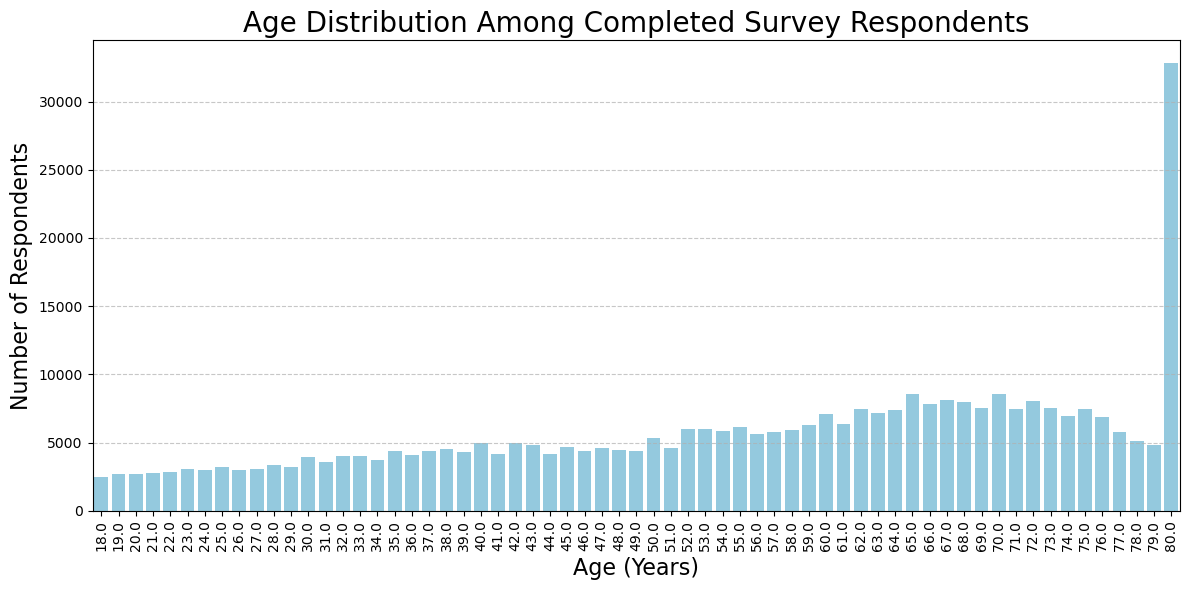

In [19]:
# Age Breakdown Visualization for Completed Interviews

age_counts = df_completed['_AGE80'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, color='skyblue')

plt.title('Age Distribution Among Completed Survey Respondents', fontsize=20)
plt.xlabel('Age (Years)', fontsize=16)
plt.ylabel('Number of Respondents', fontsize=16)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
# Median age of those with heart attack
mdn_age_mi = df_completed.loc[df_completed['CVDINFR4'] == 'Yes', '_AGE80'].median()

# Median age of those with kidney disease
mdn_age_kd = df_completed.loc[df_completed['CHCKDNY2'] == 'Yes', '_AGE80'].median()

# Median age of those with both conditions
mdn_age_both = df_completed.loc[
    (df_completed['CHCKDNY2'] == 'Yes') & (df_completed['CVDINFR4'] == 'Yes'),
    '_AGE80'
].median()

print(f"Median age of those with heart attack: {mdn_age_mi:.2f}")
print(f"Median age of those with kidney disease: {mdn_age_kd:.2f}")
print(f"Median age of those with both conditions: {mdn_age_both:.2f}")

Median age of those with heart attack: 71.00
Median age of those with kidney disease: 71.00
Median age of those with both conditions: 73.00


         Condition  Count  Percentage
0     Heart Attack  19572        5.49
1   Kidney Disease  17546        4.93
2  Both Conditions   2967        0.83


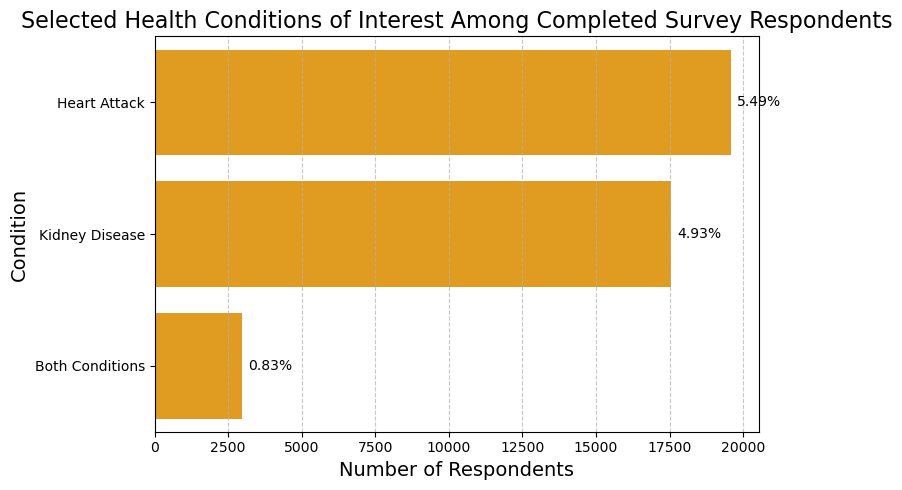

In [23]:
# Conditions of Interest: Counts and Percentages Among Completed Survey Respondents

total_completed = len(df_completed)

mi_count = (df_completed['CVDINFR4'] == 'Yes').sum()
kd_count = (df_completed['CHCKDNY2'] == 'Yes').sum()
dual_condition_count = ((df_completed['CHCKDNY2'] == 'Yes') & (df_completed['CVDINFR4'] == 'Yes')).sum()

condition_counts = pd.DataFrame({
    'Condition': ['Heart Attack', 'Kidney Disease', 'Both Conditions'],
    'Count': [mi_count, kd_count, dual_condition_count]
})

condition_counts['Percentage'] = (condition_counts['Count'] / total_completed * 100).round(2)

print(condition_counts)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=condition_counts, y='Condition', x='Count', color='orange')

for index, row in condition_counts.iterrows():
    plt.text(row['Count'] + 200, index, f"{row['Percentage']}%", va='center', fontsize=10)

plt.title('Selected Health Conditions of Interest Among Completed Survey Respondents', fontsize=16)
plt.xlabel('Number of Respondents', fontsize=14)
plt.ylabel('Condition', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Gender Distribution: Heart Attack
                     Count  Percentage
LANDSEX2                              
Male                  2888        0.81
Female                2210        0.62
Refused                  5        0.00
Don't know/Not Sure      4        0.00 



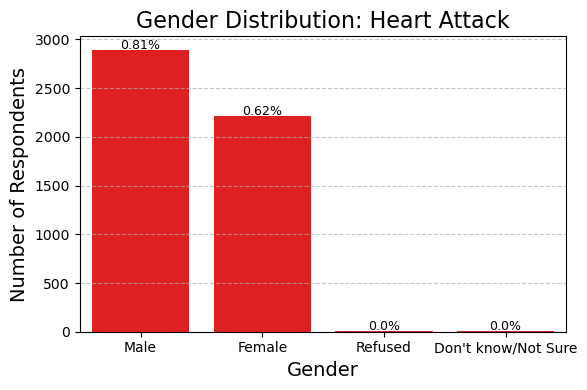

Gender Distribution: Kidney Disease
                     Count  Percentage
LANDSEX2                              
Female                2780        0.78
Male                  1814        0.51
Don't know/Not Sure      4        0.00
Refused                  1        0.00 



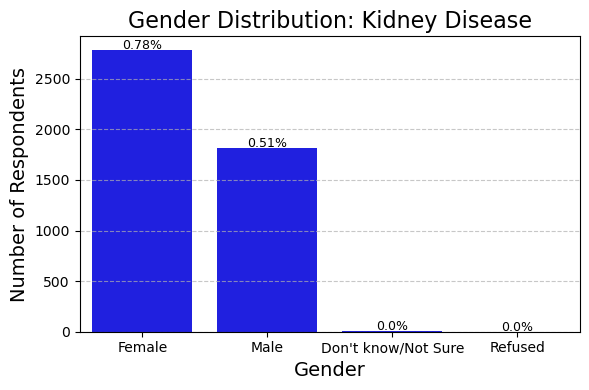

Gender Distribution: Both Heart Attack & Kidney Disease
                     Count  Percentage
LANDSEX2                              
Male                   448        0.13
Female                 382        0.11
Don't know/Not Sure      1        0.00 



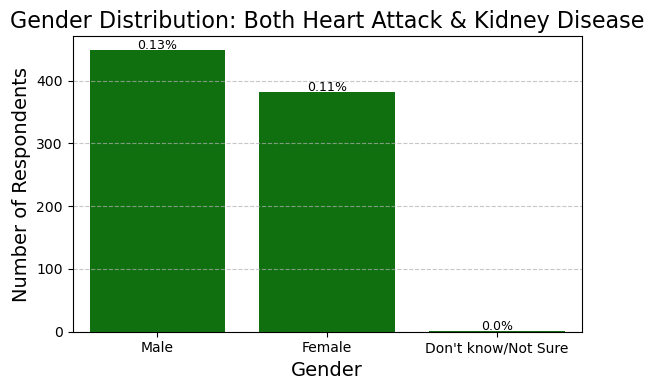

In [37]:
# Gender Distribution for Selected Health Conditions (Completed Respondents)

# MI
heart_gender_counts = df_completed[df_completed['CVDINFR4'] == 'Yes']['LANDSEX2'].value_counts()
heart_gender_percentages = (heart_gender_counts / total_completed * 100).round(2)

print("Gender Distribution: Heart Attack")
print(pd.DataFrame({
    'Count': heart_gender_counts,
    'Percentage': heart_gender_percentages
}), "\n")

plt.figure(figsize=(6, 4))
sns.countplot(
    data=df_completed[df_completed['CVDINFR4'] == 'Yes'],
    x='LANDSEX2',
    order=heart_gender_counts.index,
    color='red'
)

for i, count in enumerate(heart_gender_counts.values):
    plt.text(i, count + 10, f"{heart_gender_percentages.values[i]}%", ha='center', fontsize=9)
plt.title('Gender Distribution: Heart Attack', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#KD

kidney_gender_counts = df_completed[df_completed['CHCKDNY2'] == 'Yes']['LANDSEX2'].value_counts()
kidney_gender_percentages = (kidney_gender_counts / total_completed * 100).round(2)

print("Gender Distribution: Kidney Disease")
print(pd.DataFrame({
    'Count': kidney_gender_counts,
    'Percentage': kidney_gender_percentages
}), "\n")

plt.figure(figsize=(6, 4))
sns.countplot(
    data=df_completed[df_completed['CHCKDNY2'] == 'Yes'],
    x='LANDSEX2',
    order=kidney_gender_counts.index,
    color='blue'
)
for i, count in enumerate(kidney_gender_counts.values):
    plt.text(i, count + 10, f"{kidney_gender_percentages.values[i]}%", ha='center', fontsize=9)
plt.title('Gender Distribution: Kidney Disease', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Dual Condition

dual_gender_counts = df_completed[
    (df_completed['CHCKDNY2'] == 'Yes') & (df_completed['CVDINFR4'] == 'Yes')
]['LANDSEX2'].value_counts()
dual_gender_percentages = (dual_gender_counts / total_completed * 100).round(2)

print("Gender Distribution: Both Heart Attack & Kidney Disease")
print(pd.DataFrame({
    'Count': dual_gender_counts,
    'Percentage': dual_gender_percentages
}), "\n")

plt.figure(figsize=(6, 4))
sns.countplot(
    data=df_completed[
        (df_completed['CHCKDNY2'] == 'Yes') & (df_completed['CVDINFR4'] == 'Yes')
    ],
    x='LANDSEX2',
    order=dual_gender_counts.index,
    color='green'
)
for i, count in enumerate(dual_gender_counts.values):
    plt.text(i, count + 2, f"{dual_gender_percentages.values[i]}%", ha='center', fontsize=9)
plt.title('Gender Distribution: Both Heart Attack & Kidney Disease', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Median Age by Gender and Selected Condition

          Condition               Gender  Median Age
0      Heart Attack  Don't know/Not Sure        80.0
1      Heart Attack               Female        76.0
2      Heart Attack                 Male        76.0
3      Heart Attack              Refused        72.0
4    Kidney Disease  Don't know/Not Sure        80.0
5    Kidney Disease               Female        75.0
6    Kidney Disease                 Male        76.0
7    Kidney Disease              Refused        80.0
8   Both Conditions  Don't know/Not Sure        80.0
9   Both Conditions               Female        76.0
10  Both Conditions                 Male        77.0


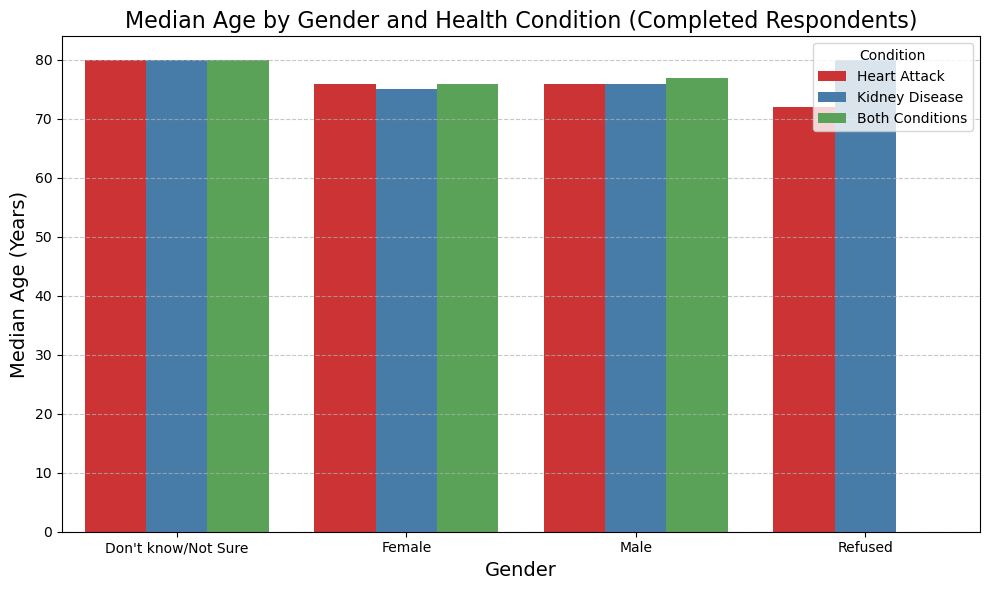

In [39]:
# Median Age by Gender and Selected Condition

median_age_data = []

conditions = {
    'Heart Attack': (df_completed['CVDINFR4'] == 'Yes'),
    'Kidney Disease': (df_completed['CHCKDNY2'] == 'Yes'),
    'Both Conditions': (df_completed['CHCKDNY2'] == 'Yes') & (df_completed['CVDINFR4'] == 'Yes')
}

for condition_label, condition_filter in conditions.items():
    df_condition = df_completed[condition_filter]
    
    medians = df_condition.groupby('LANDSEX2')['_AGE80'].median()
    
    for gender, median_age in medians.items():
        median_age_data.append({
            'Condition': condition_label,
            'Gender': gender,
            'Median Age': median_age
        })

df_median_age = pd.DataFrame(median_age_data)

print("\nMedian Age by Gender and Selected Condition\n")
print(df_median_age)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_median_age,
    x='Gender',
    y='Median Age',
    hue='Condition',
    palette='Set1'
)

plt.title('Median Age by Gender and Health Condition (Completed Respondents)', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Median Age (Years)', fontsize=14)
plt.legend(title='Condition')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Crosstab: Kidney Disease vs Heart Attack (Completed Respondents)

Heart Attack      Yes      No
Kidney Disease               
Yes              2967   14390
No              16449  319206


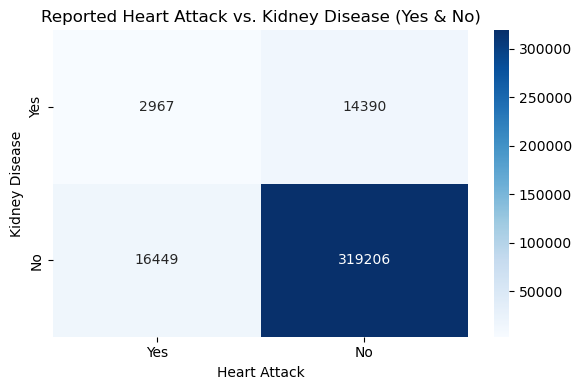

In [41]:
# Create a crosstab showing Yes/No combinations
ct = pd.crosstab(
    df_completed['CHCKDNY2'], 
    df_completed['CVDINFR4'], 
    rownames=['Kidney Disease'], 
    colnames=['Heart Attack']
)

ct_yes_responses = ct.loc[['Yes', 'No'], ['Yes', 'No']]

print("\nCrosstab: Kidney Disease vs Heart Attack (Completed Respondents)\n")
print(ct_yes_responses)

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(ct_yes_responses, annot=True, fmt='d', cmap='Blues')
plt.title('Reported Heart Attack vs. Kidney Disease (Yes & No)')
plt.tight_layout()
plt.show()

In [43]:
# Create binary outcome column
df_survey["MI_YES"] = (df_survey["CVDINFR4"] == 1).astype(int)

# Invalid values
invalid_values = [7, 8, 9, 77, 88, 99]

# Lifestyle Factors Correlation
lifestyle_cols = ["SMOKE100", "EXERANY2", "DRNKANY6"]
df_lifestyle = df_survey[lifestyle_cols + ["MI_YES"]].replace(invalid_values, np.nan).dropna()

print("Correlation with Heart Attack (Lifestyle Factors):")
for col in lifestyle_cols:
    corr, p = stats.pointbiserialr(df_lifestyle["MI_YES"], df_lifestyle[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

# Chronic Conditions Correlation
chronic_cols = ["DIABETE4", "CHCCOPD3", "CVDSTRK3", "CVDCRHD4", "BPMEDS1", "TOLDHI3"]
df_chronic = df_survey[chronic_cols + ["MI_YES"]].replace(invalid_values, np.nan).dropna()

print("\nCorrelation with Heart Attack (Chronic Conditions):")
for col in chronic_cols:
    corr, p = stats.pointbiserialr(df_chronic["MI_YES"], df_chronic[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

# Socioeconomic Factors Correlation
social_cols = ["INCOME3", "EMPLOY1", "PRIMINS1", "MEDCOST1"]
df_social = df_survey[social_cols + ["MI_YES"]].replace(invalid_values, np.nan).dropna()

print("\nCorrelation with Heart Attack (Socioeconomic Factors):")
for col in social_cols:
    corr, p = stats.pointbiserialr(df_social["MI_YES"], df_social[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

Correlation with Heart Attack (Lifestyle Factors):
SMOKE100: correlation = -0.103, p-value = 0.0000
EXERANY2: correlation = 0.086, p-value = 0.0000
DRNKANY6: correlation = 0.065, p-value = 0.0000

Correlation with Heart Attack (Chronic Conditions):
DIABETE4: correlation = -0.102, p-value = 0.0000
CHCCOPD3: correlation = -0.126, p-value = 0.0000
CVDSTRK3: correlation = -0.172, p-value = 0.0000
CVDCRHD4: correlation = -0.434, p-value = 0.0000
BPMEDS1: correlation = -0.070, p-value = 0.0000
TOLDHI3: correlation = -0.094, p-value = 0.0000

Correlation with Heart Attack (Socioeconomic Factors):
INCOME3: correlation = -0.063, p-value = 0.0000
EMPLOY1: correlation = 0.020, p-value = 0.0000
PRIMINS1: correlation = 0.045, p-value = 0.0000
MEDCOST1: correlation = -0.023, p-value = 0.0000


Correlation with Heart Attack (All Risk Factors):
EXERANY2    0.068
PRIMINS1    0.063
DRNKANY6    0.058
EMPLOY1     0.052
MEDCOST1   -0.029
SMOKE100   -0.070
INCOME3    -0.083
BPMEDS1    -0.088
CHCCOPD3   -0.090
DIABETE4   -0.093
TOLDHI3    -0.096
CVDSTRK3   -0.140
CVDCRHD4   -0.405
Name: MI_YES, dtype: float64 



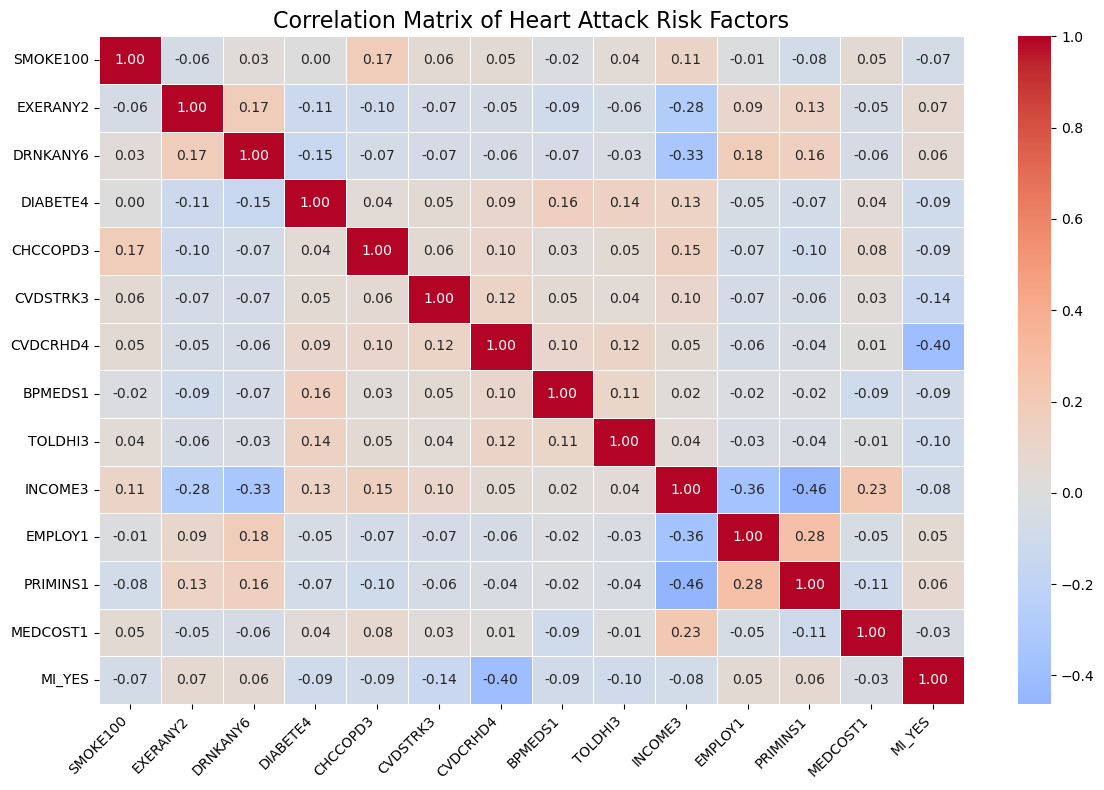

In [54]:
# Combine all relevant columns into one DataFrame for MI_YES
all_cols_mi = (
    lifestyle_cols   # ["SMOKE100","EXERANY2","DRNKANY6"]
    + chronic_cols   # ["DIABETE4","CHCCOPD3","CVDSTRK3","CVDCRHD4","BPMEDS1","TOLDHI3"]
    + social_cols    # ["INCOME3","EMPLOY1","PRIMINS1","MEDCOST1"]
    + ["MI_YES"]
)

df_corr_mi = (
    df_survey[all_cols_mi]
    .replace(invalid_values, np.nan)
    .dropna()
)

# Print correlation of each variable with MI_YES
print("Correlation with Heart Attack (All Risk Factors):")
mi_correlations = df_corr_mi.corr()["MI_YES"].drop("MI_YES")
print(mi_correlations.sort_values(ascending=False).round(3), "\n")

# Plot the full correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_corr_mi.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix of Heart Attack Risk Factors", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [45]:
# Create binary outcome column
df_survey["KD_YES"] = (df_survey["CHCKDNY2"] == 1).astype(int)

# Invalid values
invalid_values = [7, 8, 9, 77, 88, 99]

# Lifestyle Factors Correlation
lifestyle_cols = ["SMOKE100", "EXERANY2", "DRNKANY6"]
df_lifestyle = df_survey[lifestyle_cols + ["KD_YES"]].replace(invalid_values, np.nan).dropna()

print("Correlation with Kidney Disease (Lifestyle Factors):")
for col in lifestyle_cols:
    corr, p = stats.pointbiserialr(df_lifestyle["KD_YES"], df_lifestyle[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

# Chronic Conditions Correlation
chronic_cols = ["DIABETE4", "CHCCOPD3", "CVDSTRK3", "CVDCRHD4", "BPMEDS1", "TOLDHI3"]
df_chronic = df_survey[chronic_cols + ["KD_YES"]].replace(invalid_values, np.nan).dropna()

print("\nCorrelation with Kidney Disease (Chronic Conditions):")
for col in chronic_cols:
    corr, p = stats.pointbiserialr(df_chronic["KD_YES"], df_chronic[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

# Socioeconomic Factors Correlation
social_cols = ["INCOME3", "EMPLOY1", "PRIMINS1", "MEDCOST1"]
df_social = df_survey[social_cols + ["KD_YES"]].replace(invalid_values, np.nan).dropna()

print("\nCorrelation with Kidney Disease (Socioeconomic Factors):")
for col in social_cols:
    corr, p = stats.pointbiserialr(df_social["KD_YES"], df_social[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

Correlation with Kidney Disease (Lifestyle Factors):
SMOKE100: correlation = -0.039, p-value = 0.0000
EXERANY2: correlation = 0.089, p-value = 0.0000
DRNKANY6: correlation = 0.082, p-value = 0.0000

Correlation with Kidney Disease (Chronic Conditions):
DIABETE4: correlation = -0.141, p-value = 0.0000
CHCCOPD3: correlation = -0.083, p-value = 0.0000
CVDSTRK3: correlation = -0.084, p-value = 0.0000
CVDCRHD4: correlation = -0.138, p-value = 0.0000
BPMEDS1: correlation = -0.066, p-value = 0.0000
TOLDHI3: correlation = -0.057, p-value = 0.0000

Correlation with Kidney Disease (Socioeconomic Factors):
INCOME3: correlation = -0.053, p-value = 0.0000
EMPLOY1: correlation = 0.034, p-value = 0.0000
PRIMINS1: correlation = 0.032, p-value = 0.0000
MEDCOST1: correlation = -0.017, p-value = 0.0000


Correlation with Kidney Disease (All Risk Factors):
DRNKANY6    0.091
EMPLOY1     0.067
EXERANY2    0.061
PRIMINS1    0.041
SMOKE100   -0.009
MEDCOST1   -0.014
TOLDHI3    -0.050
CHCCOPD3   -0.057
CVDSTRK3   -0.066
INCOME3    -0.075
BPMEDS1    -0.075
CVDCRHD4   -0.093
DIABETE4   -0.116
Name: KD_YES, dtype: float64 



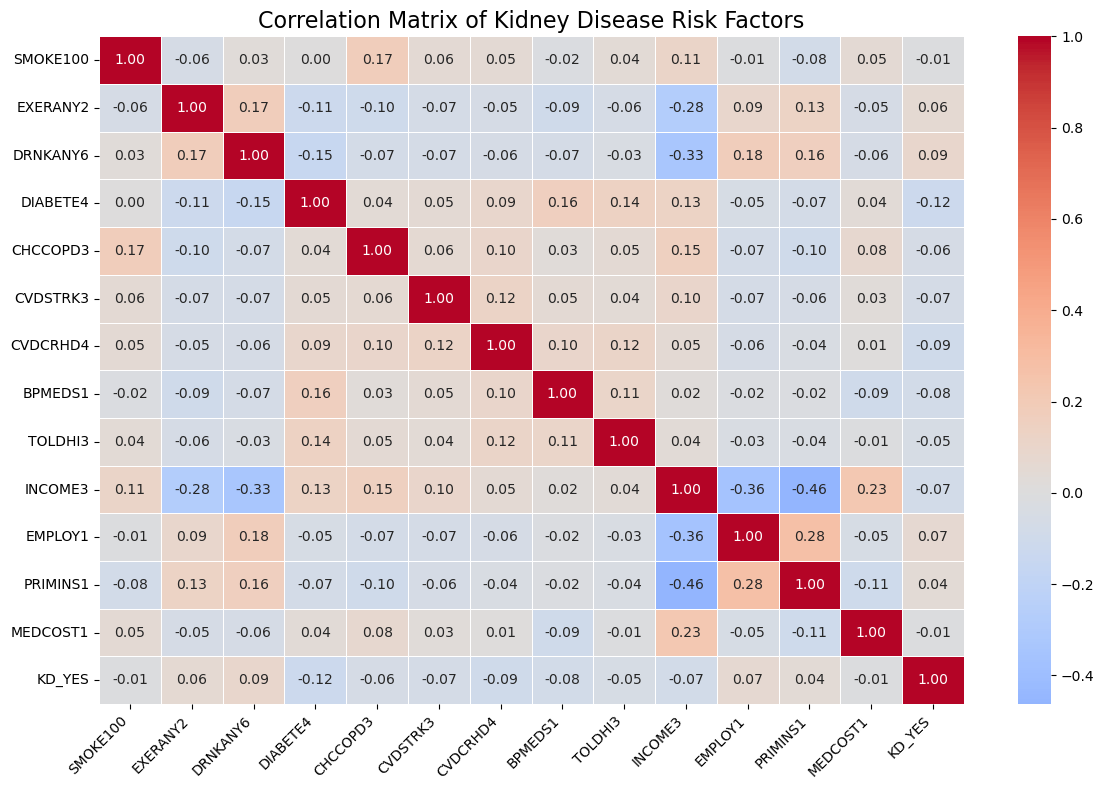

In [56]:
# Combine all relevant columns into one DataFrame for KD_YES
all_cols_kd = (
    lifestyle_cols   # ["SMOKE100","EXERANY2","DRNKANY6"]
    + chronic_cols   # ["DIABETE4","CHCCOPD3","CVDSTRK3","CVDCRHD4","BPMEDS1","TOLDHI3"]
    + social_cols    # ["INCOME3","EMPLOY1","PRIMINS1","MEDCOST1"]
    + ["KD_YES"]
)

df_corr_kd = (
    df_survey[all_cols_kd]
    .replace(invalid_values, np.nan)
    .dropna()
)

# Print correlation of each variable with KD_YES
print("Correlation with Kidney Disease (All Risk Factors):")
kd_correlations = df_corr_kd.corr()["KD_YES"].drop("KD_YES")
print(kd_correlations.sort_values(ascending=False).round(3), "\n")

# Plot the full correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_corr_kd.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix of Kidney Disease Risk Factors", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [58]:
# Create binary outcome columns
df_survey["DUAL_DIAGNOSIS"] = ((df_survey["MI_YES"] == 1) & (df_survey["KD_YES"] == 1)).astype(int)

# Invalid values
invalid_values = [7, 8, 9, 77, 88, 99]

# Lifestyle Factors Correlation
lifestyle_cols = ["SMOKE100", "EXERANY2", "DRNKANY6"]
df_lifestyle = df_survey[lifestyle_cols + ["DUAL_DIAGNOSIS"]].replace(invalid_values, np.nan).dropna()

print("Correlation with Dual Diagnosis (Lifestyle Factors):")
for col in lifestyle_cols:
    corr, p = stats.pointbiserialr(df_lifestyle["DUAL_DIAGNOSIS"], df_lifestyle[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

# Chronic Conditions Correlation
chronic_cols = ["DIABETE4", "CHCCOPD3", "CVDSTRK3", "CVDCRHD4", "BPMEDS1", "TOLDHI3"]
df_chronic = df_survey[chronic_cols + ["DUAL_DIAGNOSIS"]].replace(invalid_values, np.nan).dropna()

print("\nCorrelation with Dual Diagnosis (Chronic Conditions):")
for col in chronic_cols:
    corr, p = stats.pointbiserialr(df_chronic["DUAL_DIAGNOSIS"], df_chronic[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

# Socioeconomic Factors Correlation
social_cols = ["INCOME3", "EMPLOY1", "PRIMINS1", "MEDCOST1"]
df_social = df_survey[social_cols + ["DUAL_DIAGNOSIS"]].replace(invalid_values, np.nan).dropna()

print("\nCorrelation with Dual Diagnosis (Socioeconomic Factors):")
for col in social_cols:
    corr, p = stats.pointbiserialr(df_social["DUAL_DIAGNOSIS"], df_social[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

Correlation with Dual Diagnosis (Lifestyle Factors):
SMOKE100: correlation = -0.036, p-value = 0.0000
EXERANY2: correlation = 0.057, p-value = 0.0000
DRNKANY6: correlation = 0.046, p-value = 0.0000

Correlation with Dual Diagnosis (Chronic Conditions):
DIABETE4: correlation = -0.092, p-value = 0.0000
CHCCOPD3: correlation = -0.074, p-value = 0.0000
CVDSTRK3: correlation = -0.099, p-value = 0.0000
CVDCRHD4: correlation = -0.227, p-value = 0.0000
BPMEDS1: correlation = -0.032, p-value = 0.0000
TOLDHI3: correlation = -0.045, p-value = 0.0000

Correlation with Dual Diagnosis (Socioeconomic Factors):
INCOME3: correlation = -0.029, p-value = 0.0000
EMPLOY1: correlation = 0.019, p-value = 0.0000
PRIMINS1: correlation = 0.016, p-value = 0.0000
MEDCOST1: correlation = -0.007, p-value = 0.0487


Correlation with Dual Diagnosis:
DRNKANY6    0.053
EXERANY2    0.052
EMPLOY1     0.036
PRIMINS1    0.027
MEDCOST1   -0.008
SMOKE100   -0.022
TOLDHI3    -0.030
BPMEDS1    -0.036
INCOME3    -0.042
CHCCOPD3   -0.050
CVDSTRK3   -0.064
DIABETE4   -0.074
CVDCRHD4   -0.168
Name: DUAL_DIAGNOSIS, dtype: float64




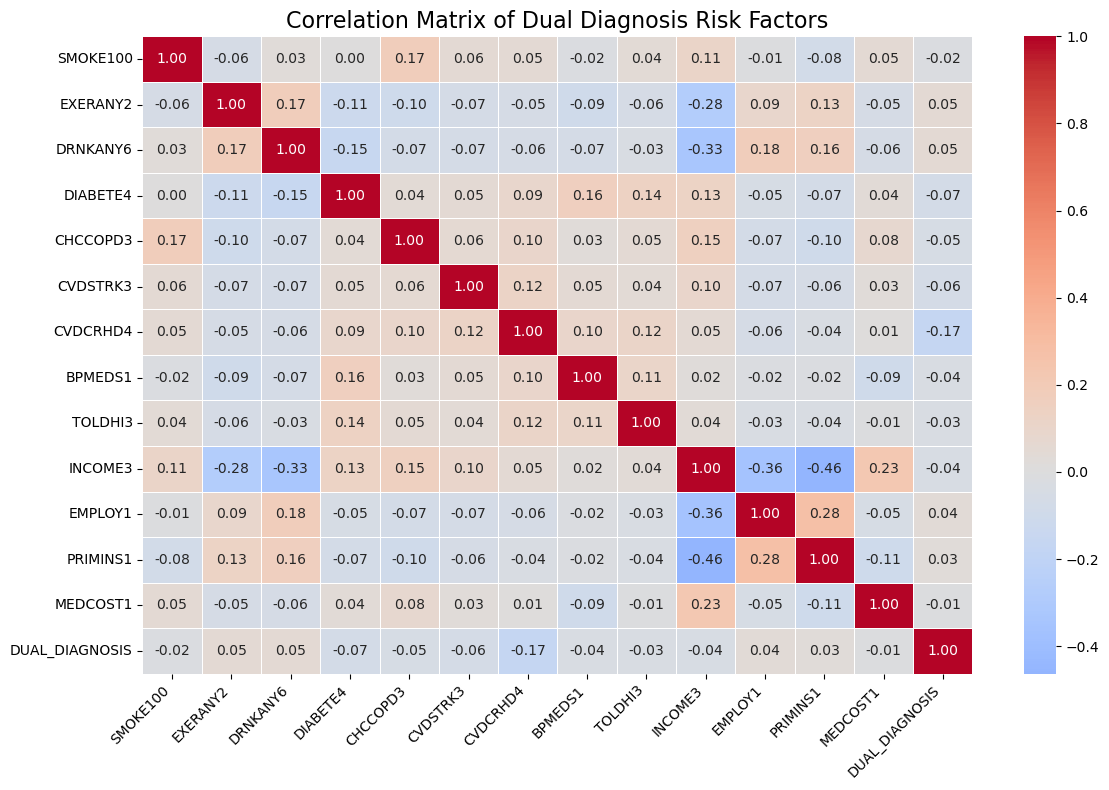

In [60]:
# Combine all relevant columns into one DataFrame
all_cols = [
    "SMOKE100", "EXERANY2", "DRNKANY6",                   # Lifestyle
    "DIABETE4", "CHCCOPD3", "CVDSTRK3", "CVDCRHD4",       # Chronic
    "BPMEDS1", "TOLDHI3",
    "INCOME3", "EMPLOY1", "PRIMINS1", "MEDCOST1",         # Socioeconomic
    "DUAL_DIAGNOSIS"
]

# Replace invalid BRFSS codes and drop missing
invalid_values = [7, 8, 9, 77, 88, 99]
df_corr = df_survey[all_cols].replace(invalid_values, np.nan).dropna()

# Print correlation of each variable with DUAL_DIAGNOSIS
print("Correlation with Dual Diagnosis:")
correlations = df_corr.corr()["DUAL_DIAGNOSIS"].drop("DUAL_DIAGNOSIS")
print(correlations.sort_values(ascending=False).round(3))
print("\n")

# Plot the full correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Matrix of Dual Diagnosis Risk Factors", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Summary Statistics for Outlier Detection

                min  25%  50%   75%   max
SMOKE100        1.0  1.0  2.0   2.0   2.0
EXERANY2        1.0  1.0  1.0   2.0   2.0
DRNKANY6        1.0  1.0  1.0   2.0   2.0
DIABETE4        1.0  3.0  3.0   3.0   4.0
CHCCOPD3        1.0  2.0  2.0   2.0   2.0
CVDSTRK3        1.0  2.0  2.0   2.0   2.0
CVDCRHD4        1.0  2.0  2.0   2.0   2.0
BPMEDS1         1.0  1.0  1.0   1.0   2.0
TOLDHI3         1.0  1.0  1.0   2.0   2.0
INCOME3         1.0  5.0  6.0  10.0  11.0
EMPLOY1         1.0  1.0  1.0   2.0   6.0
PRIMINS1        1.0  1.0  1.0   3.0  10.0
MEDCOST1        1.0  2.0  2.0   2.0   2.0
DUAL_DIAGNOSIS  0.0  0.0  0.0   0.0   1.0


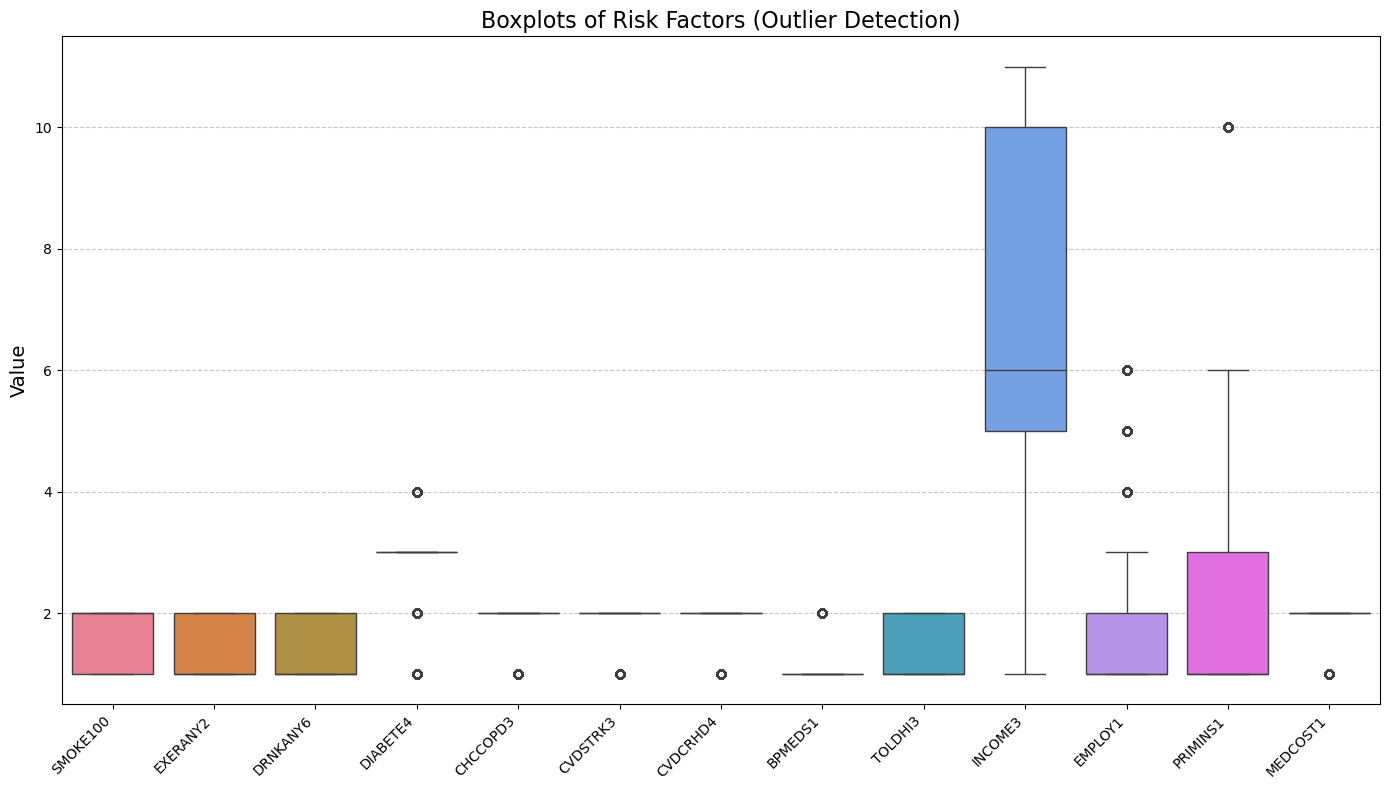

In [62]:
# Replace invalid BRFSS codes and drop missing values first
invalid_values = [7, 8, 9, 77, 88, 99]
df_outliers = df_survey[all_cols].replace(invalid_values, np.nan).dropna()

# Summary statistics
print("\nSummary Statistics for Outlier Detection\n")
summary_stats = df_outliers.describe().T.round(2)
print(summary_stats[['min', '25%', '50%', '75%', 'max']])

# Plot boxplots
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_outliers.drop(columns='DUAL_DIAGNOSIS'))  # Drop label column from boxplots
plt.title('Boxplots of Risk Factors (Outlier Detection)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Dual Diagnosis Target Distribution (%)

DUAL_DIAGNOSIS
0    99.22
1     0.78
Name: proportion, dtype: float64


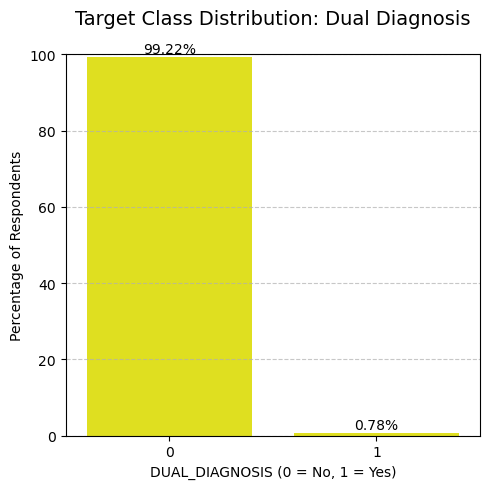

In [64]:
# Check Target Balance

target_distribution = df_outliers['DUAL_DIAGNOSIS'].value_counts(normalize=True).round(4) * 100
print("\nDual Diagnosis Target Distribution (%)\n")
print(target_distribution)

# Plot
plt.figure(figsize=(5, 5))
sns.barplot(x=target_distribution.index, y=target_distribution.values, color= 'yellow')

for index, value in enumerate(target_distribution.values):
    plt.text(index, value + 1, f"{value:.2f}%", ha='center', fontsize=10)

plt.title('Target Class Distribution: Dual Diagnosis\n', fontsize=14)
plt.xlabel('DUAL_DIAGNOSIS (0 = No, 1 = Yes)')
plt.ylabel('Percentage of Respondents')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Prepare Features and Target for Modeling

    Select relevant features
    
    Set DUAL_DIAGNOSIS as the target variable
    
    Replace invalid values with NaN and drop missing rows
    
    Standardize features using StandardScaler
    
    Split the dataset into training and testing sets

In [66]:
# Extract features and target
features = [
    "SMOKE100", "EXERANY2", "DRNKANY6",                   # Lifestyle
    "DIABETE4", "CHCCOPD3", "CVDSTRK3", "CVDCRHD4",       # Chronic
    "BPMEDS1", "TOLDHI3",
    "INCOME3", "EMPLOY1", "PRIMINS1", "MEDCOST1"          # Socioeconomic
]
target = "DUAL_DIAGNOSIS"

# Clean data
df_model = df_survey[features + [target]].replace(invalid_values, np.nan).dropna()
X = df_model[features]
y = df_model[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset (use scaled features!)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

Modeling: Logistic Regression with Balanced Class Weights

    Train a baseline logistic regression model with class_weight='balanced'
    
    Evaluate model performance using accuracy, precision, recall, F1 score, and a confusion matrix
    
    Perform hyperparameter tuning with GridSearchCV to optimize model
    
    Analyze and visualize feature importance using model coefficients
    
    Select top features based on importance using SelectFromModel
    
    Retrain the model using selected features
    
    Re-evaluate performance on selected features with updated metrics and confusion matrix
    
    Plot ROC curve and compute AUC for final model

Logistic Regression Baseline (class_weight = balanced):
              precision    recall  f1-score   support

           0       1.00      0.81      0.90      7003
           1       0.03      0.73      0.05        52

    accuracy                           0.81      7055
   macro avg       0.51      0.77      0.48      7055
weighted avg       0.99      0.81      0.89      7055

Accuracy: 0.8123
Precision: 0.0282
Recall:    0.7308
F1 Score:  0.0543


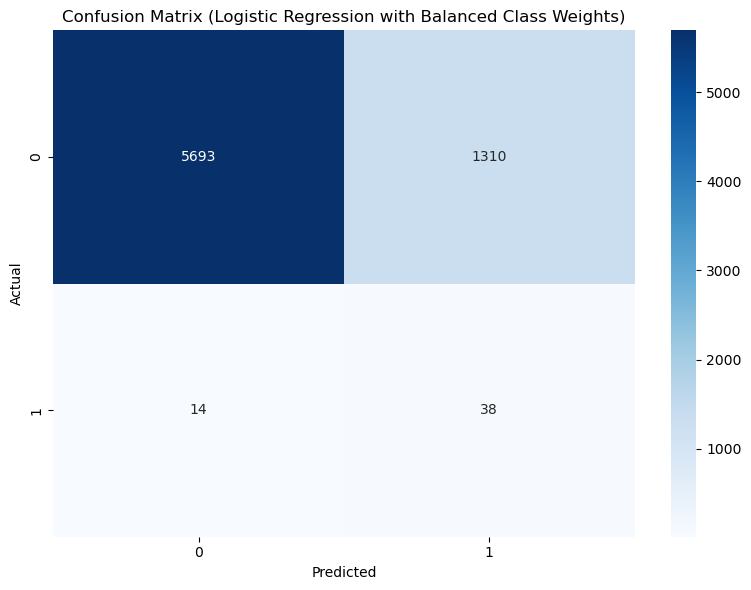

In [68]:
# Baseline Logistic Regression with class_weight='balanced'

lr_balanced = LogisticRegression(max_iter=2000, class_weight='balanced')

# Train
lr_balanced.fit(X_train, y_train)

# Predict
y_pred_balanced = lr_balanced.predict(X_test)

# Evaluate
print("Logistic Regression Baseline (class_weight = balanced):")
print(classification_report(y_test, y_pred_balanced, zero_division=0))

accuracy = accuracy_score(y_test, y_pred_balanced)
precision = precision_score(y_test, y_pred_balanced, zero_division=0)
recall = recall_score(y_test, y_pred_balanced, zero_division=0)
f1 = f1_score(y_test, y_pred_balanced, zero_division=0)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


# Confusion Matrix
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_balanced, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression with Balanced Class Weights)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [70]:
# Parameter Search: Logistic Regression with Balanced Class Weights
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],      
    'penalty': ['l1', 'l2'],             
    'solver': ['liblinear', 'saga']      
}

grid_search_lr = GridSearchCV(
    LogisticRegression(max_iter=2000, class_weight='balanced'),  
    param_grid_lr,
    cv=5,
    scoring='f1',   
    verbose=2,
    n_jobs=-1
)

grid_search_lr.fit(X_train, y_train)

print("\nLogistic Regression with Balanced Class Weights (GridSearchCV)\n")
print(f"Best Cross-Validation F1: {grid_search_lr.best_score_:.4f}")
print(f"Best Hyperparameters: {grid_search_lr.best_params_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Logistic Regression with Balanced Class Weights (GridSearchCV)

Best Cross-Validation F1: 0.0603
Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}



Test Set Performance: Logistic Regression Best Estimator with Balanced Class Weights

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      7003
           1       0.03      0.73      0.06        52

    accuracy                           0.82      7055
   macro avg       0.51      0.77      0.48      7055
weighted avg       0.99      0.82      0.89      7055

Accuracy: 0.8173
Precision: 0.0289
Recall:    0.7308
F1 Score:  0.0557


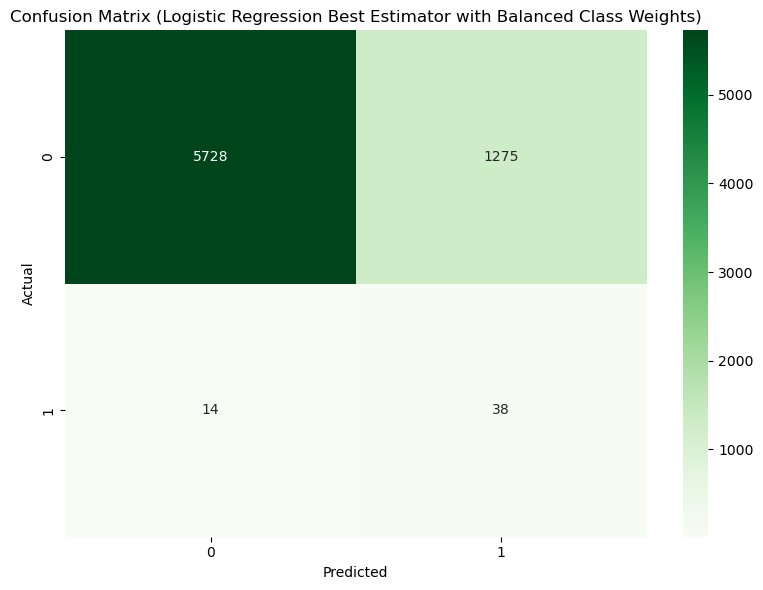

In [72]:
# Evaluate on test set
y_pred_lr_best = grid_search_lr.predict(X_test)

print("\nTest Set Performance: Logistic Regression Best Estimator with Balanced Class Weights\n")
print(classification_report(y_test, y_pred_lr_best, zero_division=0))

accuracy = accuracy_score(y_test, y_pred_lr_best)
precision = precision_score(y_test, y_pred_lr_best, zero_division=0)
recall = recall_score(y_test, y_pred_lr_best, zero_division=0)
f1 = f1_score(y_test, y_pred_lr_best, zero_division=0)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Confusion Matrix Logistic Regression Best Estimator with Balanced Class Weights
conf_matrix_lr_best = confusion_matrix(y_test, y_pred_lr_best)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_lr_best, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Logistic Regression Best Estimator with Balanced Class Weights)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


Feature Importance (Logistic Regression Best Estimator with Balanced Class Weights)

MEDCOST1    0.045713
INCOME3     0.052814
SMOKE100    0.064265
PRIMINS1    0.101549
TOLDHI3     0.118570
EMPLOY1     0.199861
CHCCOPD3    0.205560
CVDSTRK3    0.216577
DRNKANY6    0.292466
EXERANY2    0.319910
DIABETE4    0.371267
BPMEDS1     0.392963
CVDCRHD4    0.541514
dtype: float64


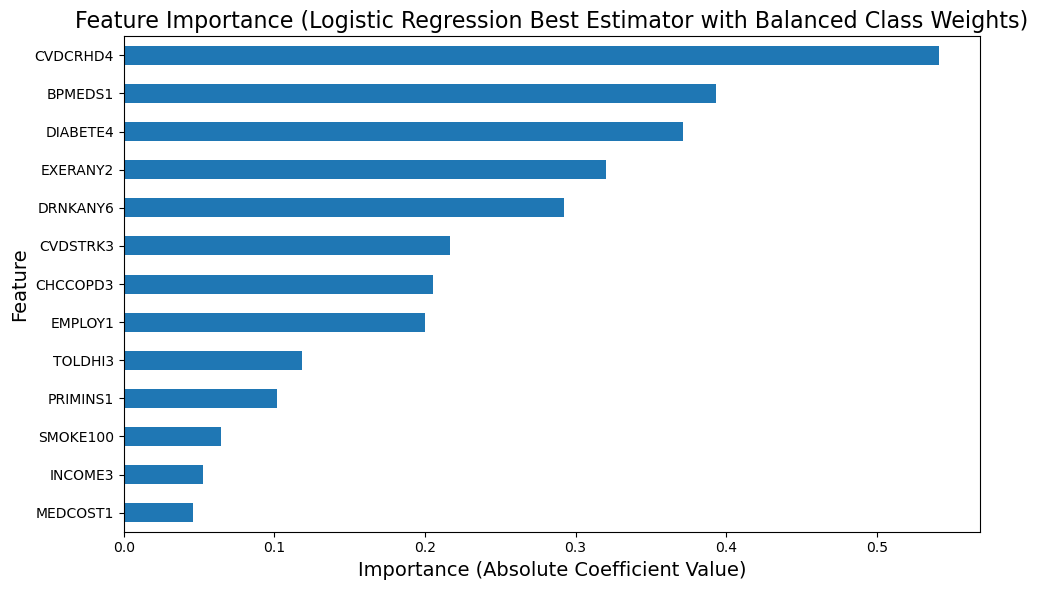

In [76]:
# Feature Importance: Logistic Regression Best Estimator with Balanced Class Weights

coefs = grid_search_lr.best_estimator_.coef_.flatten()

feature_importance_series = pd.Series(np.abs(coefs), index=features).sort_values(ascending=True)

print("\nFeature Importance (Logistic Regression Best Estimator with Balanced Class Weights)\n")
print(feature_importance_series)

# Plot
plt.figure(figsize=(10, 6))
feature_importance_series.plot(kind='barh')
plt.title('Feature Importance (Logistic Regression Best Estimator with Balanced Class Weights)', fontsize=16)
plt.xlabel('Importance (Absolute Coefficient Value)', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

In [78]:
# Feature Selection: Logistic Regression Best Estimator with Balanced Class Weights

sfm = SelectFromModel(
    estimator=grid_search_lr.best_estimator_,
    threshold='median',  # Keep features with importance above the median
    prefit=True  
)

# Apply feature selection
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Which features were selected?
selected_features = np.array(features)[sfm.get_support()]

print("\nSelected Features Based on Logistic Regression Best Estimator with Balanced Class Weights Importances\n")
print(selected_features)

# How many features were kept?
print(f"\nNumber of Features Selected: {len(selected_features)} out of {len(features)}")

# Selected features only
selected_feature_importances = pd.Series(
    np.abs(grid_search_lr.best_estimator_.coef_.flatten())[sfm.get_support()],
    index=selected_features
).sort_values(ascending=False)

print("\nImportance of Selected Features\n")
print(selected_feature_importances)


Selected Features Based on Logistic Regression Best Estimator with Balanced Class Weights Importances

['EXERANY2' 'DRNKANY6' 'DIABETE4' 'CHCCOPD3' 'CVDSTRK3' 'CVDCRHD4'
 'BPMEDS1']

Number of Features Selected: 7 out of 13

Importance of Selected Features

CVDCRHD4    0.541514
BPMEDS1     0.392963
DIABETE4    0.371267
EXERANY2    0.319910
DRNKANY6    0.292466
CVDSTRK3    0.216577
CHCCOPD3    0.205560
dtype: float64



Logistic Regression Best Estimator with Balanced Class Weights on Selected Features

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      7003
           1       0.03      0.73      0.06        52

    accuracy                           0.84      7055
   macro avg       0.52      0.79      0.49      7055
weighted avg       0.99      0.84      0.91      7055

Accuracy: 0.8418
Precision: 0.0333
Recall:    0.7308
F1 Score:  0.0638


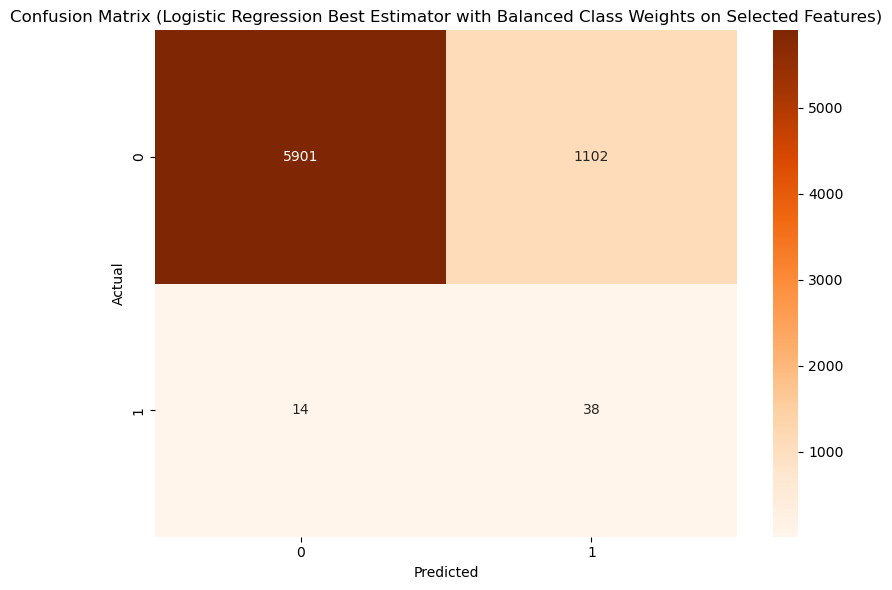

In [80]:
# Retrain Logistic Regression Best Estimator with Balanced Class Weights on Selected Features

lr_selected = LogisticRegression(max_iter=2000, class_weight='balanced')

# Train on selected features
lr_selected.fit(X_train_selected, y_train)

# Predict on selected features
y_pred_selected = lr_selected.predict(X_test_selected)

# Evaluate
print("\nLogistic Regression Best Estimator with Balanced Class Weights on Selected Features\n")
print(classification_report(y_test, y_pred_selected, zero_division=0))

accuracy = accuracy_score(y_test, y_pred_selected)
precision = precision_score(y_test, y_pred_selected, zero_division=0)
recall = recall_score(y_test, y_pred_selected, zero_division=0)
f1 = f1_score(y_test, y_pred_selected, zero_division=0)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Confusion Matrix
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_selected, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix (Logistic Regression Best Estimator with Balanced Class Weights on Selected Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


Logistic Regression Best Estimator with Balanced Class Weights on Selected Features (AUC)

AUC: 0.8340


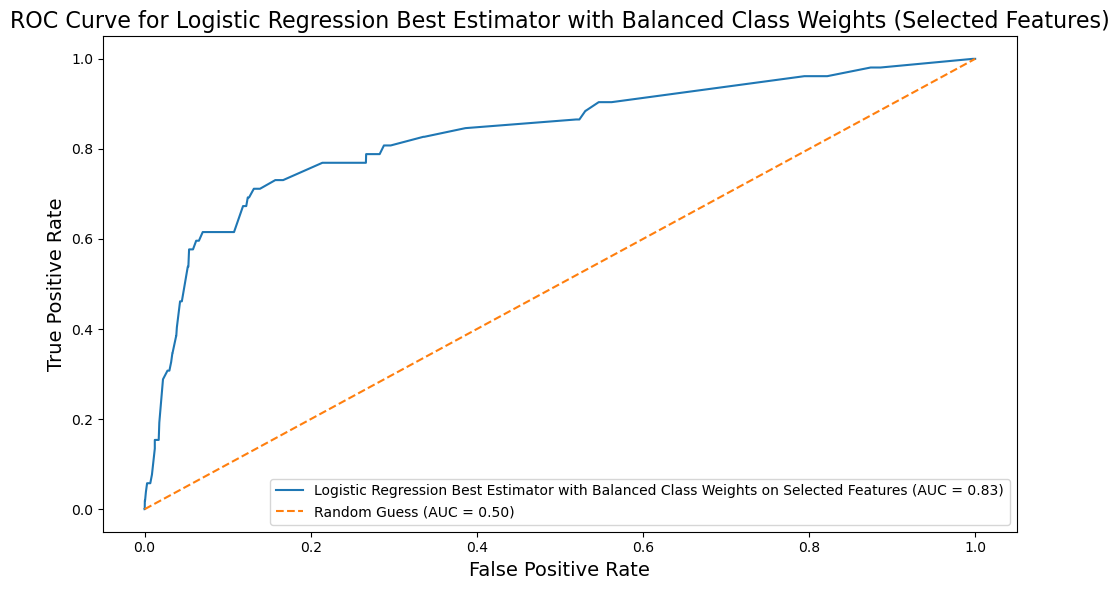

In [84]:
# ROC Curve and AUC:Logistic Regression Best Estimator with Balanced Class Weights on Selected Features

y_score_selected = lr_selected.predict_proba(X_test_selected)[:, 1]
fpr_selected, tpr_selected, _ = roc_curve(y_test, y_score_selected)
roc_auc_selected = auc(fpr_selected, tpr_selected)

print("\nLogistic Regression Best Estimator with Balanced Class Weights on Selected Features (AUC)\n")
print(f"AUC: {roc_auc_selected:.4f}") 

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_selected, tpr_selected, label=f'Logistic Regression Best Estimator with Balanced Class Weights on Selected Features (AUC = {roc_auc_selected:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess (AUC = 0.50)')
plt.title('ROC Curve for Logistic Regression Best Estimator with Balanced Class Weights (Selected Features)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

Modeling: PCA-Based Logistic Regression with Balanced Class Weights

    Apply PCA to retain 95% variance in the feature space
    
    Train and evaluate logistic regression with class_weight='balanced' on PCA-transformed data
    
    Optimize hyperparameters with GridSearchCV
    
    Reconstruct and visualize feature importances in original feature space
    
    Plot ROC curve and calculate AUC for model performance


PCA-Based Logistic Regression with Balanced Class Weights

              precision    recall  f1-score   support

           0       1.00      0.72      0.84      7001
           1       0.02      0.80      0.04        54

    accuracy                           0.72      7055
   macro avg       0.51      0.76      0.44      7055
weighted avg       0.99      0.72      0.83      7055

Accuracy: 0.7198
Precision: 0.0214
Recall:    0.7963
F1 Score:  0.0417


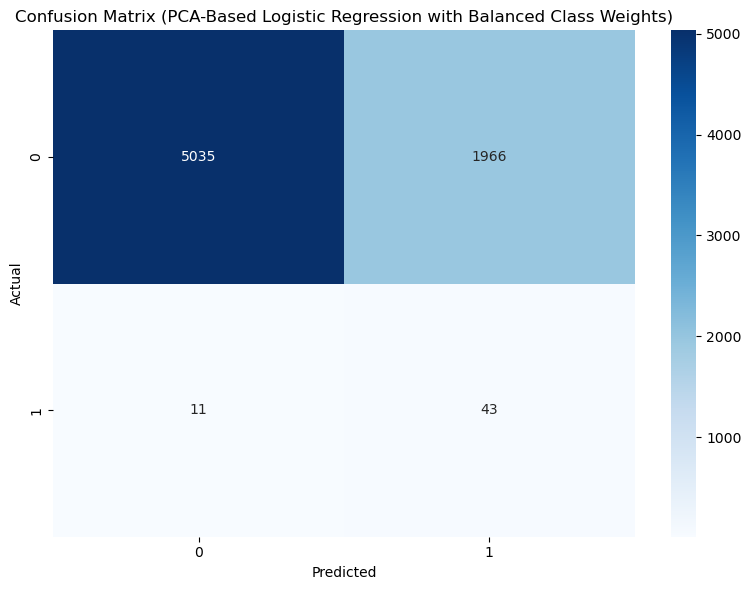

In [86]:
# PCA-Based Logistic Regression with Balanced Class Weights

pca = PCA(n_components=0.95)  # 95% variance
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3)

lr_pca_balanced = LogisticRegression(max_iter=2000, class_weight='balanced')

# Train
lr_pca_balanced.fit(X_train_pca, y_train)

# Predict
y_pred_pca_balanced = lr_pca_balanced.predict(X_test_pca)

# Evaluate
print("\nPCA-Based Logistic Regression with Balanced Class Weights\n")
print(classification_report(y_test, y_pred_pca_balanced, zero_division=0))

accuracy = accuracy_score(y_test, y_pred_pca_balanced)
precision = precision_score(y_test, y_pred_pca_balanced, zero_division=0)
recall = recall_score(y_test, y_pred_pca_balanced, zero_division=0)
f1 = f1_score(y_test, y_pred_pca_balanced, zero_division=0)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Confusion Matrix
conf_matrix_pca_balanced = confusion_matrix(y_test, y_pred_pca_balanced)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_pca_balanced, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (PCA-Based Logistic Regression with Balanced Class Weights)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits

PCA-Based Logistic Regression with Balanced Class Weights (GridSearchCV)

Best Cross-Validation F1: 0.0331
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Test Set Performance: PCA-Based Logistic Regression with Balanced Class Weights

              precision    recall  f1-score   support

           0       1.00      0.72      0.84      7001
           1       0.02      0.80      0.04        54

    accuracy                           0.72      7055
   macro avg       0.51      0.76      0.44      7055
weighted avg       0.99      0.72      0.83      7055

Accuracy: 0.7198
Precision: 0.0214
Recall:    0.7963
F1 Score:  0.0417


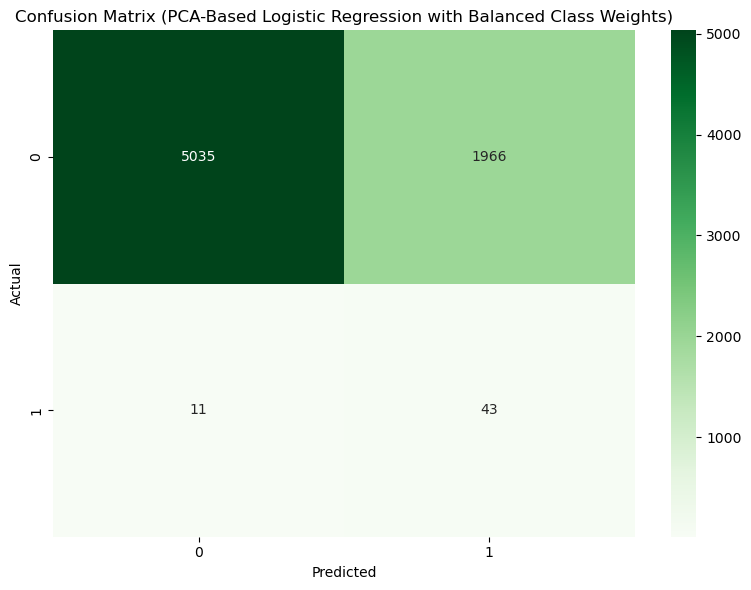

In [88]:
# Parameter Search: PCA-Based Logistic Regression with Balanced Class Weights
param_grid_lr_pca = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search_lr_pca = GridSearchCV(
    LogisticRegression(max_iter=2000, class_weight='balanced'),
    param_grid_lr_pca,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

grid_search_lr_pca.fit(X_train_pca, y_train)

print("\nPCA-Based Logistic Regression with Balanced Class Weights (GridSearchCV)\n")
print(f"Best Cross-Validation F1: {grid_search_lr_pca.best_score_:.4f}")
print(f"Best Hyperparameters: {grid_search_lr_pca.best_params_}")

y_pred_lr_pca_best = grid_search_lr_pca.predict(X_test_pca)

print("\nTest Set Performance: PCA-Based Logistic Regression with Balanced Class Weights\n")
print(classification_report(y_test, y_pred_lr_pca_best, zero_division=0))

accuracy = accuracy_score(y_test, y_pred_lr_pca_best)
precision = precision_score(y_test, y_pred_lr_pca_best, zero_division=0)
recall = recall_score(y_test, y_pred_lr_pca_best, zero_division=0)
f1 = f1_score(y_test, y_pred_lr_pca_best, zero_division=0)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Confusion Matrix
conf_matrix_lr_pca_best = confusion_matrix(y_test, y_pred_lr_pca_best)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_lr_pca_best, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (PCA-Based Logistic Regression with Balanced Class Weights)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


Feature Importance (Reconstructed to Original Features after PCA)

CVDSTRK3    0.031431
MEDCOST1    0.037192
CHCCOPD3    0.080702
CVDCRHD4    0.085711
PRIMINS1    0.116276
EMPLOY1     0.180112
EXERANY2    0.185755
INCOME3     0.210094
BPMEDS1     0.308449
DRNKANY6    0.448194
SMOKE100    0.718946
TOLDHI3     0.848862
DIABETE4    0.860096
dtype: float64


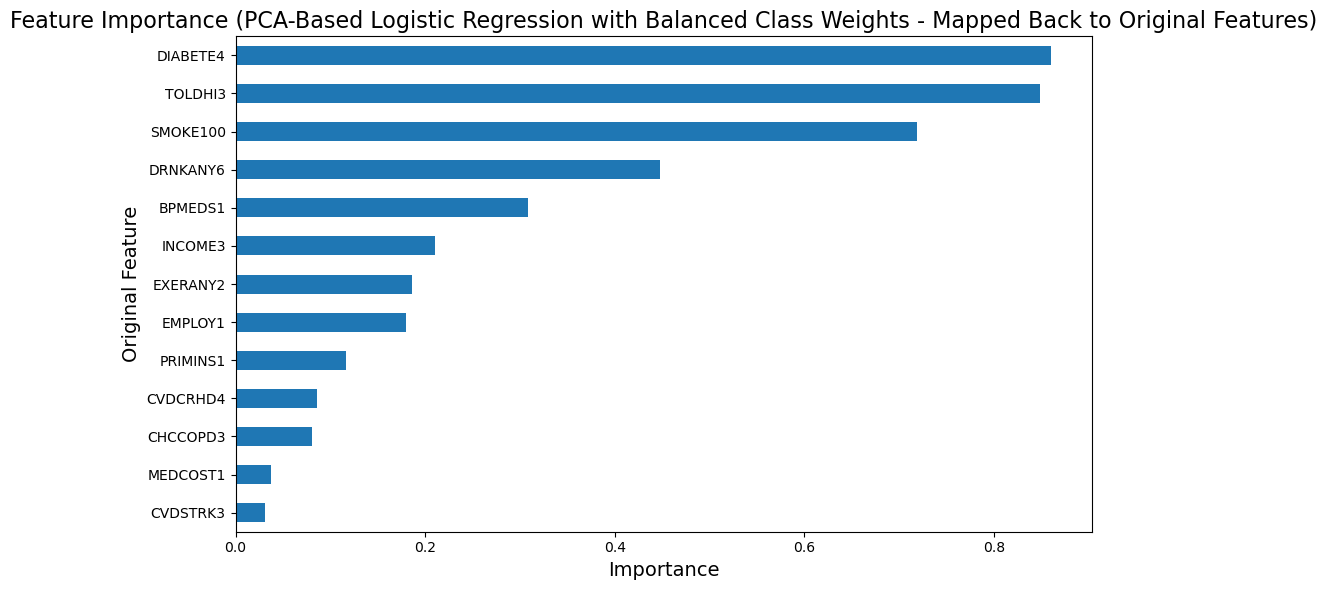

In [90]:
# Feature Importance: PCA-Based Logistic Regression with Balanced Class Weights

# Coefficients for PCA components
coefs_pca = grid_search_lr_pca.best_estimator_.coef_.flatten()

# Each row of pca.components_ corresponds to a principal component and each column is an original feature
pca_components = pca.components_

# Reconstruct feature importances to original features
feature_importance_original = np.dot(np.abs(coefs_pca), np.abs(pca_components))

feature_importance_series_pca = pd.Series(feature_importance_original, index=features).sort_values(ascending=True)

# Print
print("\nFeature Importance (Reconstructed to Original Features after PCA)\n")
print(feature_importance_series_pca)

# Plot
plt.figure(figsize=(10, 6))
feature_importance_series_pca.plot(kind='barh')
plt.title('Feature Importance (PCA-Based Logistic Regression with Balanced Class Weights - Mapped Back to Original Features)', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Original Feature', fontsize=14)
plt.tight_layout()
plt.show()


PCA-Based Logistic Regression with Balanced Class Weights (Best Estimator) AUC

AUC: 0.8122


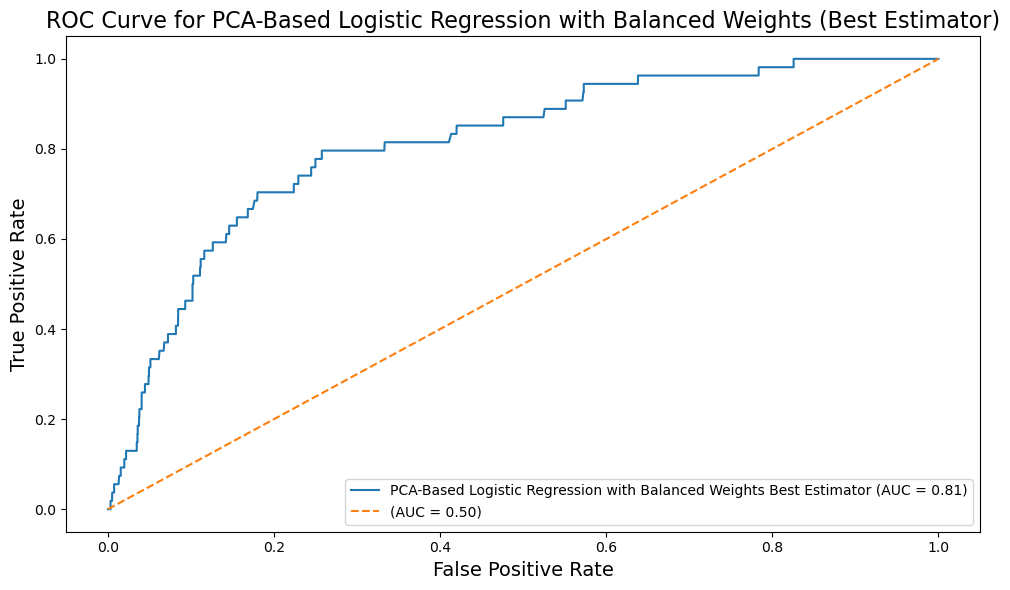

In [92]:
# ROC Curve and AUC: PCA-Based Logistic Regression with Balanced Class Weights

y_score_lr_pca_best = grid_search_lr_pca.predict_proba(X_test_pca)[:, 1]
fpr_lr_pca, tpr_lr_pca, _ = roc_curve(y_test, y_score_lr_pca_best)
roc_auc_lr_pca = auc(fpr_lr_pca, tpr_lr_pca)

print("\nPCA-Based Logistic Regression with Balanced Class Weights (Best Estimator) AUC\n")
print(f"AUC: {roc_auc_lr_pca:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr_pca, tpr_lr_pca, label=f'PCA-Based Logistic Regression with Balanced Weights Best Estimator (AUC = {roc_auc_lr_pca:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='(AUC = 0.50)')
plt.title('ROC Curve for PCA-Based Logistic Regression with Balanced Weights (Best Estimator)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

Modeling: Random Forest Classification (Balanced Class Weights)

    Train a baseline Random Forest model with class_weight='balanced'
    
    Evaluate initial performance using accuracy, precision, recall, F1 score, and confusion matrix
    
    Perform hyperparameter tuning with GridSearchCV to optimize model parameters
    
    Analyze and visualize feature importance using .feature_importances_
    
    Select top features using SelectFromModel (median threshold)
    
    Retrain the model using selected features only
    
    Re-evaluate model performance on selected features
    
    Plot ROC curve and compute AUC for the final model


Test Set Performance: Random Forest Baseline with Balanced Class Weights

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      7001
           1       0.01      0.04      0.01        54

    accuracy                           0.94      7055
   macro avg       0.50      0.49      0.49      7055
weighted avg       0.98      0.94      0.96      7055

Accuracy: 0.9416
Precision: 0.0055
Recall:    0.0370
F1 Score:  0.0096


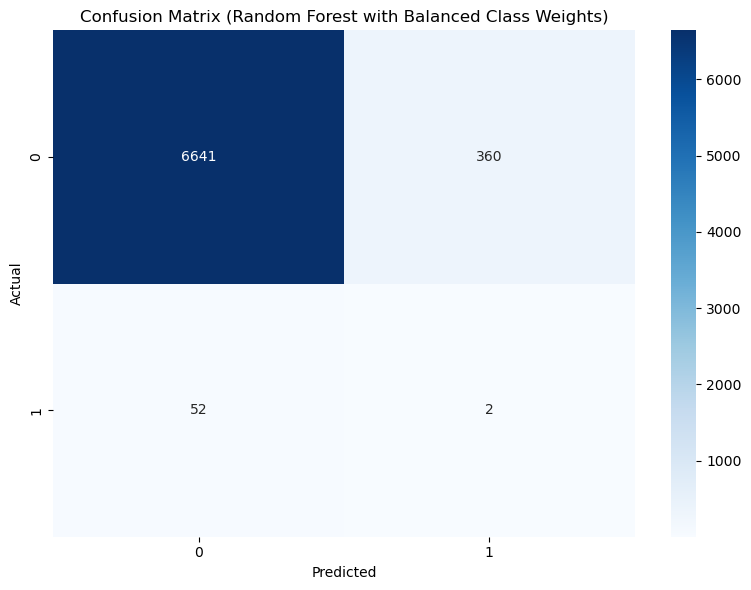

In [94]:
# Random Forest Classifier with Balanced Class Weights

rf_balanced = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=100
)

# Train
rf_balanced.fit(X_train, y_train)

# Predict
y_pred_rf_balanced = rf_balanced.predict(X_test)

# Evaluate
print("\nTest Set Performance: Random Forest Baseline with Balanced Class Weights\n")
print(classification_report(y_test, y_pred_rf_balanced, zero_division=0))

accuracy = accuracy_score(y_test, y_pred_rf_balanced)
precision = precision_score(y_test, y_pred_rf_balanced, zero_division=0)
recall = recall_score(y_test, y_pred_rf_balanced, zero_division=0)
f1 = f1_score(y_test, y_pred_rf_balanced, zero_division=0)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Confusion Matrix
conf_matrix_rf_balanced = confusion_matrix(y_test, y_pred_rf_balanced)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_rf_balanced, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Forest with Balanced Class Weights)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Random Forest with Balanced Class Weights (GridSearchCV)

Best Cross-Validation F1: 0.0190
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}

Test Set Performance: Random Forest Best Estimator with Balanced Class Weights

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      7001
           1       0.01      0.19      0.02        54

    accuracy                           0.87      7055
   macro avg       0.50      0.53      0.47      7055
weighted avg       0.99      0.87      0.92      7055

Accuracy: 0.8653
Precision: 0.0109
Recall:    0.1852
F1 Score:  0.0206


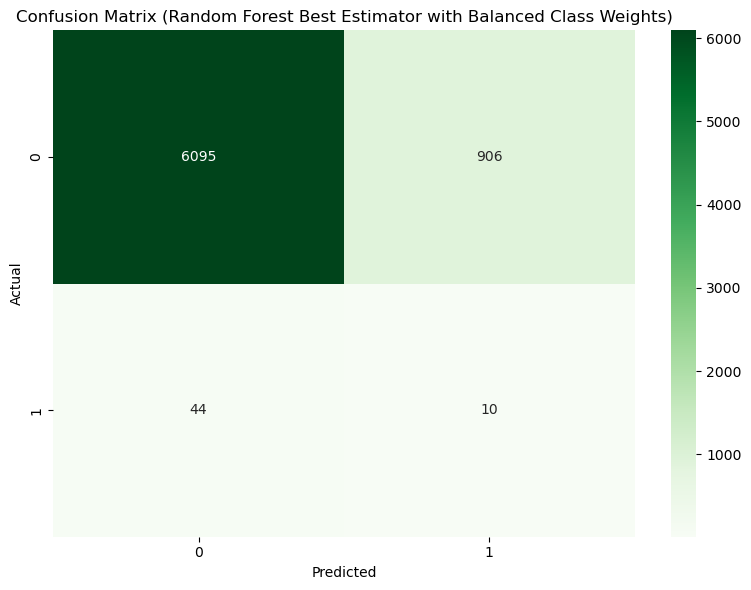

In [96]:
# Parameter Search: Random Forest with Balanced Class Weights

param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(class_weight='balanced'),
    param_grid_rf,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)

print("\nRandom Forest with Balanced Class Weights (GridSearchCV)\n")
print(f"Best Cross-Validation F1: {grid_search_rf.best_score_:.4f}")
print(f"Best Hyperparameters: {grid_search_rf.best_params_}")

# Evaluate on test set
y_pred_rf_best = grid_search_rf.predict(X_test)

print("\nTest Set Performance: Random Forest Best Estimator with Balanced Class Weights\n")
print(classification_report(y_test, y_pred_rf_best, zero_division=0))

accuracy = accuracy_score(y_test, y_pred_rf_best)
precision = precision_score(y_test, y_pred_rf_best, zero_division=0)
recall = recall_score(y_test, y_pred_rf_best, zero_division=0)
f1 = f1_score(y_test, y_pred_rf_best, zero_division=0)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Confusion Matrix
conf_matrix_rf_best = confusion_matrix(y_test, y_pred_rf_best)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_rf_best, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Random Forest Best Estimator with Balanced Class Weights)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


Feature Importance (Random Forest Best Estimator with Balanced Class Weights)

CVDCRHD4    0.032328
CVDSTRK3    0.036969
CHCCOPD3    0.050916
MEDCOST1    0.053627
DRNKANY6    0.055271
BPMEDS1     0.058271
EXERANY2    0.062663
SMOKE100    0.070405
TOLDHI3     0.073187
EMPLOY1     0.110129
DIABETE4    0.115183
PRIMINS1    0.120156
INCOME3     0.160894
dtype: float64


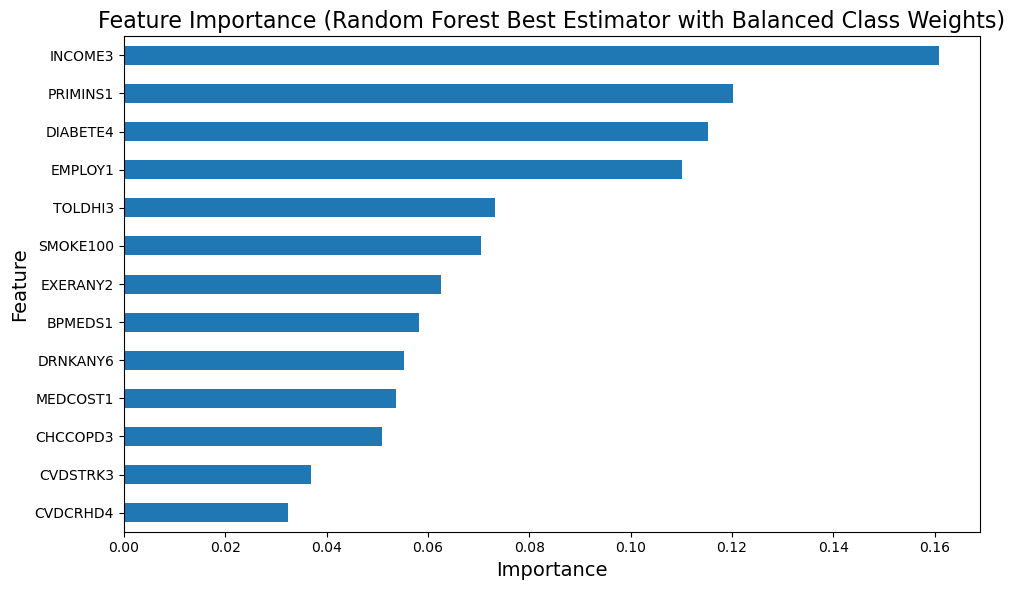

In [98]:
# Feature Importance: Random Forest Best Estimator with Balanced Class Weights

feature_importance_rf = pd.Series(
    grid_search_rf.best_estimator_.feature_importances_,
    index=features
).sort_values(ascending=True)

print("\nFeature Importance (Random Forest Best Estimator with Balanced Class Weights)\n")
print(feature_importance_rf)

# Plot
plt.figure(figsize=(10, 6))
feature_importance_rf.plot(kind='barh')
plt.title('Feature Importance (Random Forest Best Estimator with Balanced Class Weights)', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

In [100]:
# Feature Selection: Random Forest Best Estimator with Balanced Class Weights

sfm_rf = SelectFromModel(
    estimator=grid_search_rf.best_estimator_,
    threshold='median',  # Keep features above median importance
    prefit=True
)

# Apply feature selection
X_train_rf_selected = sfm_rf.transform(X_train)
X_test_rf_selected = sfm_rf.transform(X_test)

# Which features were selected?
selected_features_rf = np.array(features)[sfm_rf.get_support()]

print("\nSelected Features Based on Random Forest Best Estimator with Balanced Class Weights Importances\n")
print(selected_features_rf)

# How many features were kept?
print(f"\nNumber of Features Selected: {len(selected_features_rf)} out of {len(features)}")

# Selected features only
selected_feature_importances_rf = pd.Series(
    grid_search_rf.best_estimator_.feature_importances_[sfm_rf.get_support()],
    index=selected_features_rf
).sort_values(ascending=False)

print("\nImportance of Selected Features\n")
print(selected_feature_importances_rf)


Selected Features Based on Random Forest Best Estimator with Balanced Class Weights Importances

['SMOKE100' 'EXERANY2' 'DIABETE4' 'TOLDHI3' 'INCOME3' 'EMPLOY1' 'PRIMINS1']

Number of Features Selected: 7 out of 13

Importance of Selected Features

INCOME3     0.160894
PRIMINS1    0.120156
DIABETE4    0.115183
EMPLOY1     0.110129
TOLDHI3     0.073187
SMOKE100    0.070405
EXERANY2    0.062663
dtype: float64



Random Forest Best Estimator with Balanced Class Weights on Selected Features

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      7001
           1       0.01      0.09      0.01        54

    accuracy                           0.89      7055
   macro avg       0.50      0.50      0.48      7055
weighted avg       0.98      0.89      0.94      7055

Accuracy: 0.8937
Precision: 0.0071
Recall:    0.0926
F1 Score:  0.0132


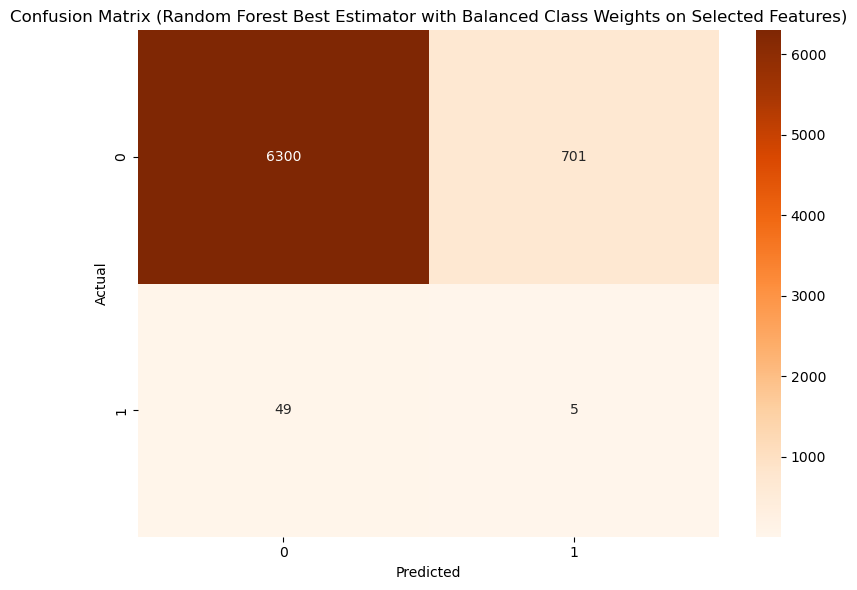

In [102]:
# Retrain Random Forest Best Estimator with Balanced Class Weights on Selected Features

rf_selected = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=100
)

# Train
rf_selected.fit(X_train_rf_selected, y_train)

# Predict
y_pred_rf_selected = rf_selected.predict(X_test_rf_selected)

# Evaluate
print("\nRandom Forest Best Estimator with Balanced Class Weights on Selected Features\n")
print(classification_report(y_test, y_pred_rf_selected, zero_division=0))

accuracy = accuracy_score(y_test, y_pred_rf_selected)
precision = precision_score(y_test, y_pred_rf_selected, zero_division=0)
recall = recall_score(y_test, y_pred_rf_selected, zero_division=0)
f1 = f1_score(y_test, y_pred_rf_selected, zero_division=0)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Confusion Matrix
conf_matrix_selected = confusion_matrix(y_test, y_pred_rf_selected)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_selected, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix (Random Forest Best Estimator with Balanced Class Weights on Selected Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


Random Forest Best Estimator with Balanced Class Weights on Selected Features (AUC)

AUC: 0.4573


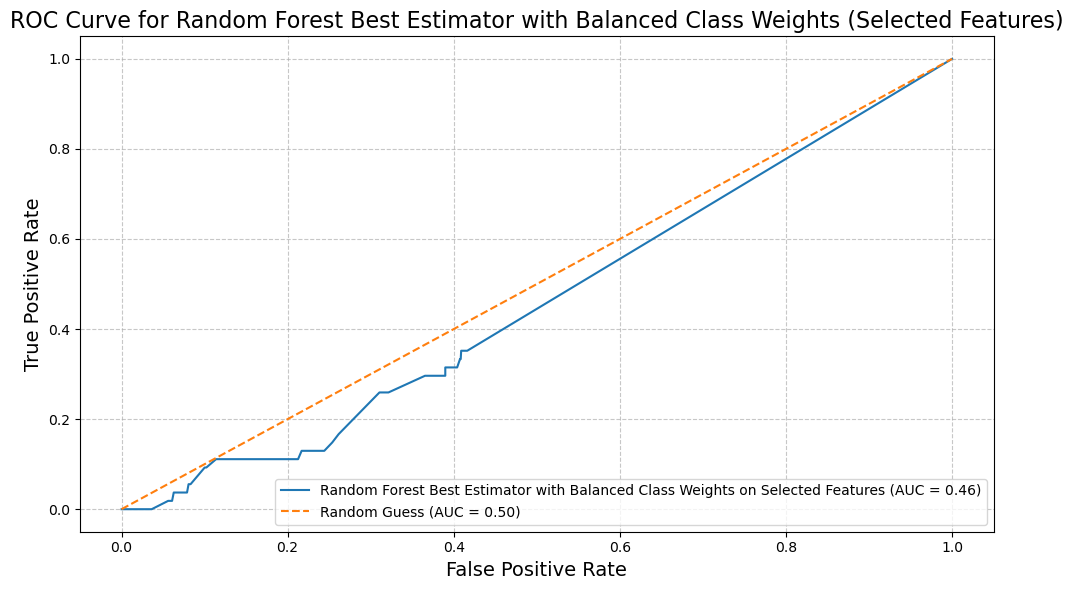

In [104]:
# ROC Curve and AUC: Random Forest Best Estimator with Balanced Class Weights on Selected Features

y_score_rf_selected = rf_selected.predict_proba(X_test_rf_selected)[:, 1]

fpr_rf_selected, tpr_rf_selected, _ = roc_curve(y_test, y_score_rf_selected)

roc_auc_rf_selected = auc(fpr_rf_selected, tpr_rf_selected)

print("\nRandom Forest Best Estimator with Balanced Class Weights on Selected Features (AUC)\n")
print(f"AUC: {roc_auc_rf_selected:.4f}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_selected, tpr_rf_selected, label=f'Random Forest Best Estimator with Balanced Class Weights on Selected Features (AUC = {roc_auc_rf_selected:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess (AUC = 0.50)')
plt.title('ROC Curve for Random Forest Best Estimator with Balanced Class Weights (Selected Features)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Modeling: Decision Tree Classification (Balanced Class Weights)

    Train a baseline Decision Tree model with class_weight='balanced'
    
    Evaluate baseline performance using accuracy, precision, recall, F1 score, and confusion matrix
    
    Perform hyperparameter tuning with GridSearchCV to optimize tree parameters
    
    Analyze and visualize feature importance using .feature_importances_
    
    Select top features using SelectFromModel based on median importance
    
    Retrain the model using only the selected features
    
    Re-evaluate model performance on selected features with updated metrics and confusion matrix
    
    Visualize the final decision tree structure
    
    Plot ROC curve and compute AUC to assess final model performance


Decision Tree Baseline with Balanced Class Weights:

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      7001
           1       0.01      0.07      0.01        54

    accuracy                           0.89      7055
   macro avg       0.50      0.49      0.48      7055
weighted avg       0.98      0.89      0.94      7055

Accuracy: 0.8913
Precision: 0.0055
Recall:    0.0741
F1 Score:  0.0103


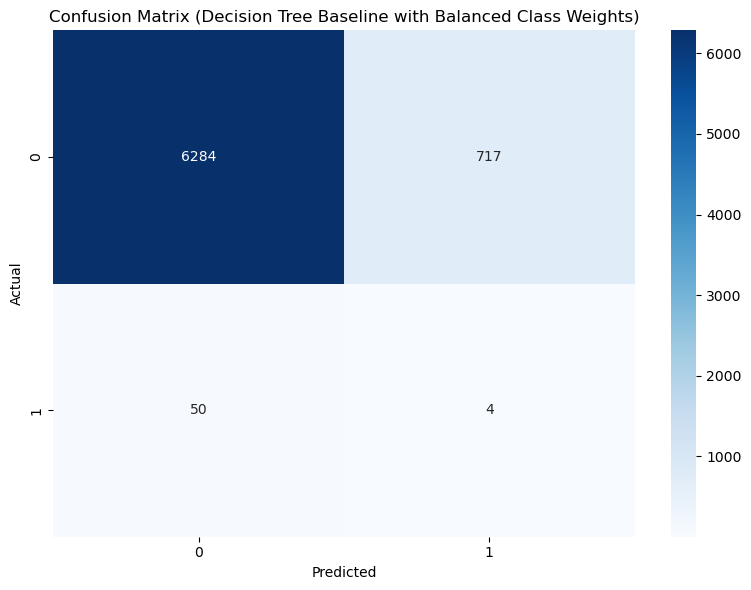

In [106]:
# Baseline Decision Tree Classifier with Balanced Class Weights

dt_balanced = DecisionTreeClassifier(class_weight='balanced')

# Train
dt_balanced.fit(X_train, y_train)

# Predict
y_pred_dt_balanced = dt_balanced.predict(X_test)

# Evaluate
print("\nDecision Tree Baseline with Balanced Class Weights:\n")
print(classification_report(y_test, y_pred_dt_balanced, zero_division=0))

accuracy = accuracy_score(y_test, y_pred_dt_balanced)
precision = precision_score(y_test, y_pred_dt_balanced, zero_division=0)
recall = recall_score(y_test, y_pred_dt_balanced, zero_division=0)
f1 = f1_score(y_test, y_pred_dt_balanced, zero_division=0)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Confusion Matrix
conf_matrix_dt_balanced = confusion_matrix(y_test, y_pred_dt_balanced)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_dt_balanced, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Decision Tree Baseline with Balanced Class Weights)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 72 candidates, totalling 360 fits

Decision Tree with Balanced Class Weights (GridSearchCV)

Best Cross-Validation F1: 0.0147
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Test Set Performance: Decision Tree Best Estimator with Balanced Class Weights

              precision    recall  f1-score   support

           0       0.99      0.57      0.72      7001
           1       0.01      0.39      0.01        54

    accuracy                           0.56      7055
   macro avg       0.50      0.48      0.37      7055
weighted avg       0.98      0.56      0.72      7055

Accuracy: 0.5644
Precision: 0.0069
Recall:    0.3889
F1 Score:  0.0135


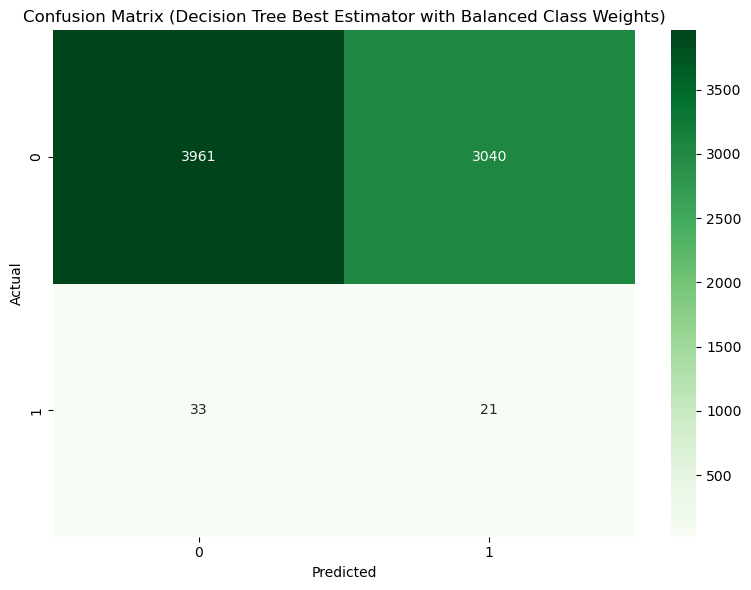

In [108]:
# Parameter Search: Decision Tree with Balanced Class Weights

param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(
    DecisionTreeClassifier(class_weight='balanced'),
    param_grid_dt,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

grid_search_dt.fit(X_train, y_train)

print("\nDecision Tree with Balanced Class Weights (GridSearchCV)\n")
print(f"Best Cross-Validation F1: {grid_search_dt.best_score_:.4f}")
print(f"Best Hyperparameters: {grid_search_dt.best_params_}")

# Evaluate on test set
y_pred_dt_best = grid_search_dt.predict(X_test)

print("\nTest Set Performance: Decision Tree Best Estimator with Balanced Class Weights\n")
print(classification_report(y_test, y_pred_dt_best, zero_division=0))

accuracy = accuracy_score(y_test, y_pred_dt_best)
precision = precision_score(y_test, y_pred_dt_best, zero_division=0)
recall = recall_score(y_test, y_pred_dt_best, zero_division=0)
f1 = f1_score(y_test, y_pred_dt_best, zero_division=0)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Confusion Matrix
conf_matrix_dt_best = confusion_matrix(y_test, y_pred_dt_best)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_dt_best, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Decision Tree Best Estimator with Balanced Class Weights)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


Feature Importance (Decision Tree Best Estimator with Balanced Class Weights)

CVDCRHD4    0.017846
CHCCOPD3    0.018983
SMOKE100    0.025161
MEDCOST1    0.037007
DIABETE4    0.041080
CVDSTRK3    0.041102
TOLDHI3     0.054518
BPMEDS1     0.064651
DRNKANY6    0.068527
EXERANY2    0.074016
EMPLOY1     0.113422
INCOME3     0.202885
PRIMINS1    0.240801
dtype: float64


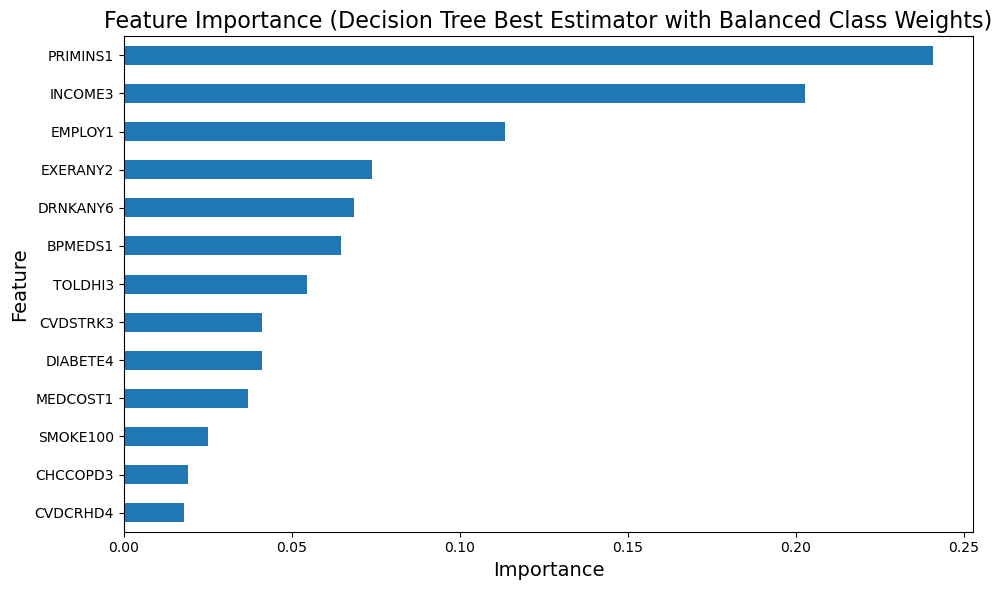

In [110]:
# Feature Importance: Decision Tree Best Estimator with Balanced Class Weights

feature_importance_dt = pd.Series(
    grid_search_dt.best_estimator_.feature_importances_,
    index=features
).sort_values(ascending=True)

print("\nFeature Importance (Decision Tree Best Estimator with Balanced Class Weights)\n")
print(feature_importance_dt)

# Plot
plt.figure(figsize=(10, 6))
feature_importance_dt.plot(kind='barh')
plt.title('Feature Importance (Decision Tree Best Estimator with Balanced Class Weights)', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

In [112]:
# Feature Selection: Decision Tree Best Estimator with Balanced Class Weights

sfm_dt = SelectFromModel(
    estimator=grid_search_dt.best_estimator_,
    threshold='median',  # Keep features above median importance
    prefit=True
)

# Apply feature selection
X_train_dt_selected = sfm_dt.transform(X_train)
X_test_dt_selected = sfm_dt.transform(X_test)

# Which features were selected?
selected_features_dt = np.array(features)[sfm_dt.get_support()]

print("\nSelected Features Based on Decision Tree Best Estimator with Balanced Class Weights Importances\n")
print(selected_features_dt)

# How many features were kept?
print(f"\nNumber of Features Selected: {len(selected_features_dt)} out of {len(features)}")

# Selected features only
selected_feature_importances_dt = pd.Series(
    grid_search_dt.best_estimator_.feature_importances_[sfm_dt.get_support()],
    index=selected_features_dt
).sort_values(ascending=False)

print("\nImportance of Selected Features\n")
print(selected_feature_importances_dt)


Selected Features Based on Decision Tree Best Estimator with Balanced Class Weights Importances

['EXERANY2' 'DRNKANY6' 'BPMEDS1' 'TOLDHI3' 'INCOME3' 'EMPLOY1' 'PRIMINS1']

Number of Features Selected: 7 out of 13

Importance of Selected Features

PRIMINS1    0.240801
INCOME3     0.202885
EMPLOY1     0.113422
EXERANY2    0.074016
DRNKANY6    0.068527
BPMEDS1     0.064651
TOLDHI3     0.054518
dtype: float64



Decision Tree Best Estimator with Balanced Class Weights on Selected Features

              precision    recall  f1-score   support

           0       0.99      0.68      0.81      7001
           1       0.01      0.28      0.01        54

    accuracy                           0.68      7055
   macro avg       0.50      0.48      0.41      7055
weighted avg       0.98      0.68      0.80      7055

Accuracy: 0.6775
Precision: 0.0067
Recall:    0.2778
F1 Score:  0.0130


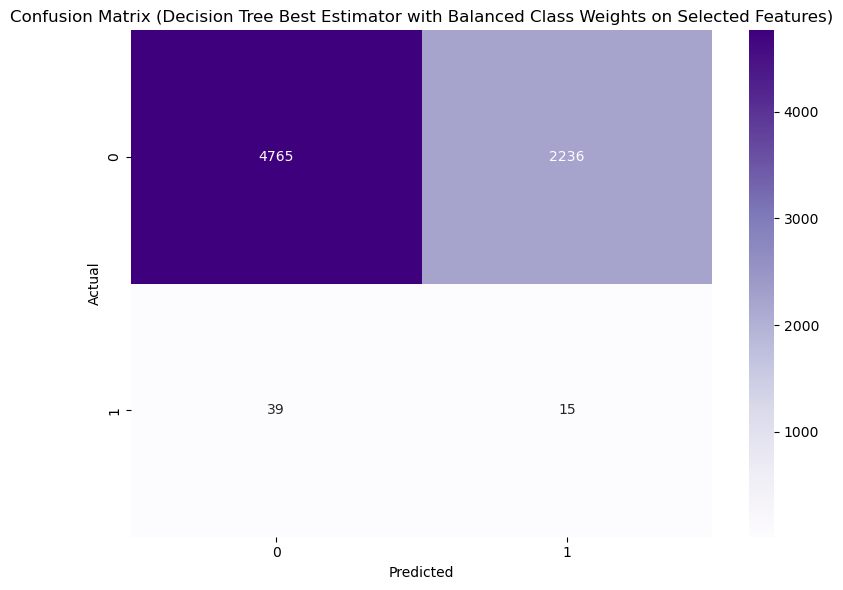

In [114]:
# Retrain Decision Tree Best Estimator with Balanced Class Weights on Selected Features

dt_selected = DecisionTreeClassifier(class_weight='balanced')

# Train
dt_selected.fit(X_train_dt_selected, y_train)

# Predict
y_pred_dt_selected = dt_selected.predict(X_test_dt_selected)

# Evaluate
print("\nDecision Tree Best Estimator with Balanced Class Weights on Selected Features\n")
print(classification_report(y_test, y_pred_dt_selected, zero_division=0))

accuracy = accuracy_score(y_test, y_pred_dt_selected)
precision = precision_score(y_test, y_pred_dt_selected, zero_division=0)
recall = recall_score(y_test, y_pred_dt_selected, zero_division=0)
f1 = f1_score(y_test, y_pred_dt_selected, zero_division=0)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Confusion Matrix
conf_matrix_dt_selected = confusion_matrix(y_test, y_pred_dt_selected)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_dt_selected, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix (Decision Tree Best Estimator with Balanced Class Weights on Selected Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

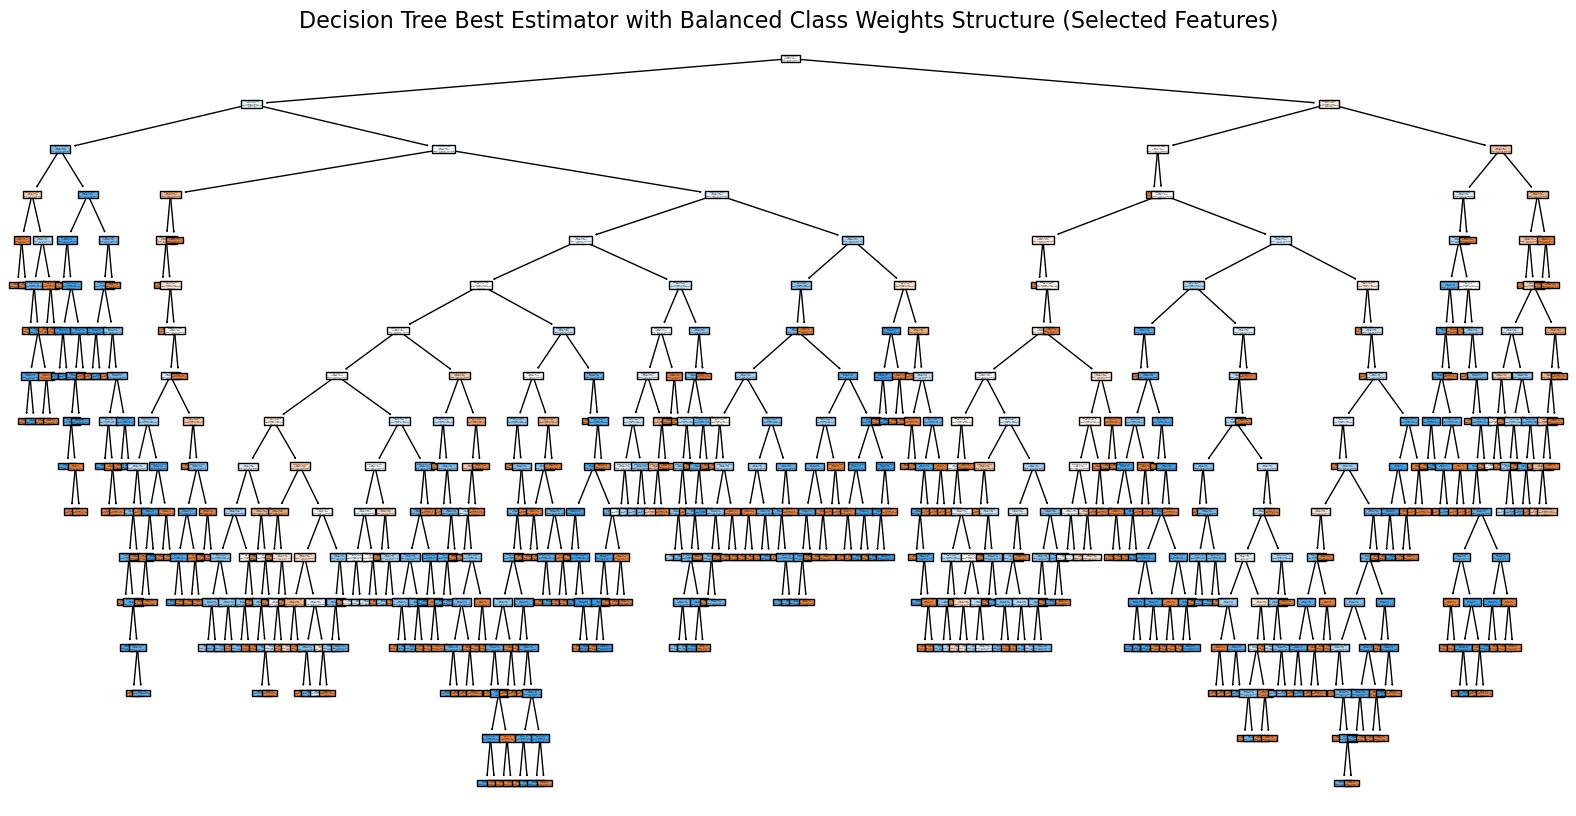

In [118]:
# Visualize Decision Tree Structure
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_selected, feature_names=selected_features_dt, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Best Estimator with Balanced Class Weights Structure (Selected Features)", fontsize=16)
plt.show()


Decision Tree Best Estimator with Balanced Class Weights on Selected Features (AUC)

AUC: 0.4775


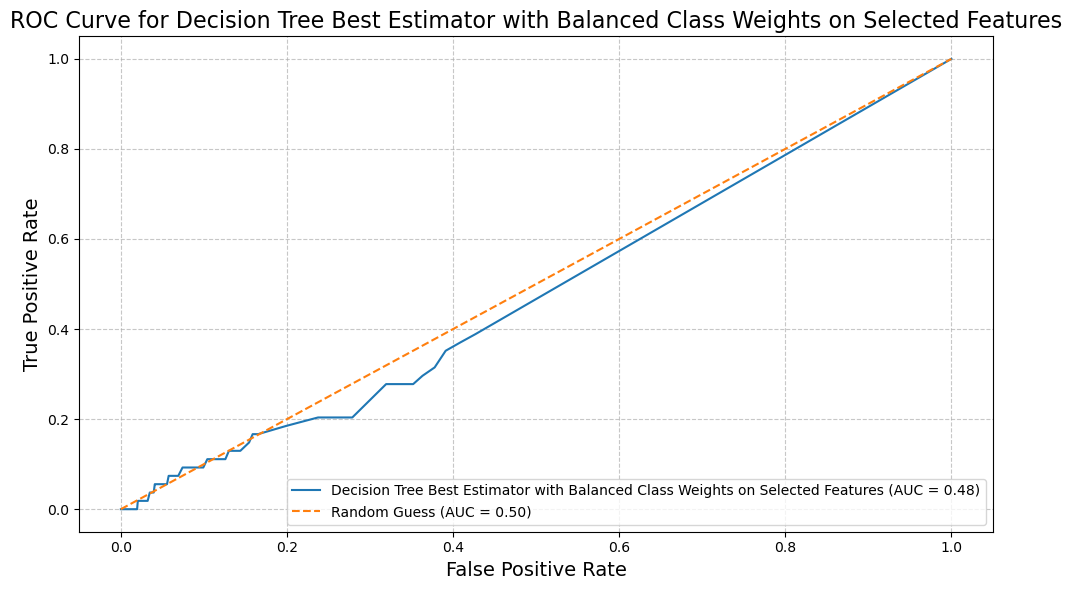

In [124]:
# ROC Curve and AUC: Decision Tree Best Estimator with Balanced Class Weights on Selected Features

y_score_dt_selected = dt_selected.predict_proba(X_test_dt_selected)[:, 1]
fpr_dt_selected, tpr_dt_selected, _ = roc_curve(y_test, y_score_dt_selected)
roc_auc_dt_selected = auc(fpr_dt_selected, tpr_dt_selected)

print("\nDecision Tree Best Estimator with Balanced Class Weights on Selected Features (AUC)\n")
print(f"AUC: {roc_auc_dt_selected:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt_selected, tpr_dt_selected, label=f'Decision Tree Best Estimator with Balanced Class Weights on Selected Features (AUC = {roc_auc_dt_selected:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess (AUC = 0.50)')
plt.title('ROC Curve for Decision Tree Best Estimator with Balanced Class Weights on Selected Features', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()